In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("merged_df15.csv",
                                 #on_bad_lines='skip', delimiter=';'
                                )

In [5]:
data.head()

Start date             End date  \
0  2023-01-01 00:00:00  2023-01-01 00:15:00   
1  2023-01-01 00:15:00  2023-01-01 00:30:00   
2  2023-01-01 00:30:00  2023-01-01 00:45:00   
3  2023-01-01 00:45:00  2023-01-01 01:00:00   
4  2023-01-01 01:00:00  2023-01-01 01:15:00   

   Actual_consumption_Total (grid load) [MWh]  \
0                                     9673.00   
1                                     9593.50   
2                                     9562.00   
3                                     9517.50   
4                                     9433.25   

   Actual_consumption_Residual load [MWh]  \
0                                  1842.5   
1                                  1691.5   
2                                  1442.5   
3                                  1598.5   
4                                  1325.5   

   Actual_consumption_Hydro pumped storage [MWh]  hour  day  weekday  week  \
0                                         494.00     0    1        6    52   
1                                         502.50     0    1        6    52   
2                                         561.00     0    1        6    52   
3                                         519.25     0    1        6    52   
4                                         301.00     1    1        6    52   

   month  ...  Scheduled_commercial_exchanges_Austria (export) [MWh]  \
0      1  ...                                             547.03       
1      1  ...                                             547.03       
2      1  ...                                             547.03       
3      1  ...                                             547.03       
4      1  ...                                             723.36       

   Scheduled_commercial_exchanges_Austria (import) [MWh]  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Scheduled_commercial_exchanges_France (export) [MWh]  \
0                                             859.99      
1                                             859.99      
2                                             859.99      
3                                             859.99      
4                                            1368.55      

   Scheduled_commercial_exchanges_France (import) [MWh]  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Scheduled_commercial_exchanges_Poland (export) [MWh]  \
0                                               6.43      
1                                               6.43      
2                                               6.43      
3                                               6.43      
4                                             189.40      

   Scheduled_commercial_exchanges_Poland (import) [MWh]  \
0                                              -1.43      
1                                              -1.43      
2                                              -1.43      
3                                              -1.43      
4                                              -5.88      

   Scheduled_commercial_exchanges_Norway (export) [MWh]  \
0                                             322.25      
1                                             322.25      
2                                             322.25      
3                                             322.25      
4                                             322.25      

   Scheduled_commercial_exchanges_Norway (import) [MWh]  \
0                                                0.0      
1      

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207280 entries, 0 to 207279
Columns: 128 entries, Start date to Scheduled_commercial_exchanges_Belgium (import) [MWh]
dtypes: float64(120), int64(6), object(2)
memory usage: 202.4+ MB


In [9]:
data.columns.tolist()

['Start date',
 'End date',
 'Actual_consumption_Total (grid load) [MWh]',
 'Actual_consumption_Residual load [MWh]',
 'Actual_consumption_Hydro pumped storage [MWh]',
 'hour',
 'day',
 'weekday',
 'week',
 'month',
 'year',
 'Biomass [MWh] Original resolutions',
 'Hydropower [MWh] Original resolutions',
 'Wind offshore [MWh] Original resolutions',
 'Wind onshore [MWh] Original resolutions',
 'Photovoltaics [MWh] Original resolutions',
 'Other renewable [MWh] Original resolutions',
 'Nuclear [MWh] Original resolutions',
 'Lignite [MWh] Original resolutions',
 'Hard coal [MWh] Original resolutions',
 'Fossil gas [MWh] Original resolutions',
 'Hydro pumped storage [MWh] Original resolutions',
 'Other conventional [MWh] Original resolutions',
 'Total Generation [MWh]',
 'Volume activated (+) [MWh] Original resolutions',
 'Volume activated (-) [MWh] Original resolutions',
 'Volume procured (+) [MW] Original resolutions',
 'Volume procured (-) [MW] Original resolutions',
 'Procurement price

In [11]:
# Define renaming dictionary
rename_columns = {
    'Biomass [MWh] Original resolutions': 'Actual_generation_Biomass [MWh]',
    'Hydropower [MWh] Original resolutions': 'Actual_generation_Hydropower [MWh]',
    'Wind offshore [MWh] Original resolutions': 'Actual_generation_Wind offshore [MWh]',
    'Wind onshore [MWh] Original resolutions': 'Actual_generation_Wind onshore [MWh]',
    'Photovoltaics [MWh] Original resolutions': 'Actual_generation_Photovoltaics [MWh]',
    'Other renewable [MWh] Original resolutions': 'Actual_generation_Other renewable [MWh]',
    'Nuclear [MWh] Original resolutions': 'Actual_generation_Nuclear [MWh]',
    'Lignite [MWh] Original resolutions': 'Actual_generation_Lignite [MWh]',
    'Hard coal [MWh] Original resolutions': 'Actual_generation_Hard coal [MWh]',
    'Fossil gas [MWh] Original resolutions': 'Actual_generation_Fossil gas [MWh]',
    'Hydro pumped storage [MWh] Original resolutions': 'Actual_generation_Hydro pumped storage [MWh]',
    'Other conventional [MWh] Original resolutions': 'Actual_generation_Other conventional [MWh]',
    'Total Generation [MWh]': 'Actual_generation_Total [MWh]'  # Standardized naming
}

# Apply renaming
data.rename(columns=rename_columns, inplace=True)

In [13]:
data.columns.tolist()

['Start date',
 'End date',
 'Actual_consumption_Total (grid load) [MWh]',
 'Actual_consumption_Residual load [MWh]',
 'Actual_consumption_Hydro pumped storage [MWh]',
 'hour',
 'day',
 'weekday',
 'week',
 'month',
 'year',
 'Actual_generation_Biomass [MWh]',
 'Actual_generation_Hydropower [MWh]',
 'Actual_generation_Wind offshore [MWh]',
 'Actual_generation_Wind onshore [MWh]',
 'Actual_generation_Photovoltaics [MWh]',
 'Actual_generation_Other renewable [MWh]',
 'Actual_generation_Nuclear [MWh]',
 'Actual_generation_Lignite [MWh]',
 'Actual_generation_Hard coal [MWh]',
 'Actual_generation_Fossil gas [MWh]',
 'Actual_generation_Hydro pumped storage [MWh]',
 'Actual_generation_Other conventional [MWh]',
 'Actual_generation_Total [MWh]',
 'Volume activated (+) [MWh] Original resolutions',
 'Volume activated (-) [MWh] Original resolutions',
 'Volume procured (+) [MW] Original resolutions',
 'Volume procured (-) [MW] Original resolutions',
 'Procurement price (+) [€/MW] Original resoluti

In [15]:
prefix = "Automatic_Frequency_Restoration_Reserve_"

cols_to_rename = [
    'Volume activated (+) [MWh] Original resolutions',
    'Volume activated (-) [MWh] Original resolutions',
    'Volume procured (+) [MW] Original resolutions',
    'Volume procured (-) [MW] Original resolutions',
    'Procurement price (+) [€/MW] Original resolutions',
    'Procurement price (-) [€/MW] Original resolutions'
]

data.rename(columns={col: prefix + col for col in cols_to_rename if col in data.columns}, inplace=True)

In [17]:
data.columns.tolist()

['Start date',
 'End date',
 'Actual_consumption_Total (grid load) [MWh]',
 'Actual_consumption_Residual load [MWh]',
 'Actual_consumption_Hydro pumped storage [MWh]',
 'hour',
 'day',
 'weekday',
 'week',
 'month',
 'year',
 'Actual_generation_Biomass [MWh]',
 'Actual_generation_Hydropower [MWh]',
 'Actual_generation_Wind offshore [MWh]',
 'Actual_generation_Wind onshore [MWh]',
 'Actual_generation_Photovoltaics [MWh]',
 'Actual_generation_Other renewable [MWh]',
 'Actual_generation_Nuclear [MWh]',
 'Actual_generation_Lignite [MWh]',
 'Actual_generation_Hard coal [MWh]',
 'Actual_generation_Fossil gas [MWh]',
 'Actual_generation_Hydro pumped storage [MWh]',
 'Actual_generation_Other conventional [MWh]',
 'Actual_generation_Total [MWh]',
 'Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions',
 'Automatic_Frequency_Restoration_Reserve_Volume activated (-) [MWh] Original resolutions',
 'Automatic_Frequency_Restoration_Reserve_Volume procured (+) [MW] O

In [19]:
prefix = "Balancing_energy_"

cols_to_rename = [
'Price [€/MWh] Original resolutions',
'Net income [€] Original resolutions'
]

data.rename(columns={col: prefix + col for col in cols_to_rename if col in data.columns}, inplace=True)

In [21]:
prefix = "Costs_of_TSOs_"

cols_to_rename = [
'Balancing services [€] Original resolutions',
'Network security of the TSOs [€] Original resolutions',
'Countertrading [€] Original resolutions'
]

data.rename(columns={col: prefix + col for col in cols_to_rename if col in data.columns}, inplace=True)

In [23]:
prefix = "Cross-border_physical_flows_"

cols_to_rename = [
 'Net export [MWh] Original resolutions',
 'Netherlands (export) [MWh] Original resolutions',
 'Netherlands (import) [MWh] Original resolutions',
 'Switzerland (export) [MWh] Original resolutions',
 'Switzerland (import) [MWh] Original resolutions',
 'Denmark (export) [MWh] Original resolutions',
 'Denmark (import) [MWh] Original resolutions',
 'Czech Republic (export) [MWh] Original resolutions',
 'Czech Republic (import) [MWh] Original resolutions',
 'Luxembourg (export) [MWh] Original resolutions',
 'Luxembourg (import) [MWh] Original resolutions',
 'Sweden (export) [MWh] Original resolutions',
 'Sweden (import) [MWh] Original resolutions',
 'Austria (export) [MWh] Original resolutions',
 'Austria (import) [MWh] Original resolutions',
 'France (export) [MWh] Original resolutions',
 'France (import) [MWh] Original resolutions',
 'Poland (export) [MWh] Original resolutions',
 'Poland (import) [MWh] Original resolutions',
 'Norway (export) [MWh] Original resolutions',
 'Norway (import) [MWh] Original resolutions',
 'Belgium (export) [MWh] Original resolutions',
 'Belgium (import) [MWh] Original resolutions'
]

data.rename(columns={col: prefix + col for col in cols_to_rename if col in data.columns}, inplace=True)

In [25]:
prefix = "Day-ahead_prices_"

cols_to_rename = [
 'Germany/Luxembourg [€/MWh] Original resolutions',
 '∅ DE/LU neighbours [€/MWh] Original resolutions',
 'Belgium [€/MWh] Original resolutions',
 'Denmark 1 [€/MWh] Original resolutions',
 'Denmark 2 [€/MWh] Original resolutions',
 'France [€/MWh] Original resolutions',
 'Netherlands [€/MWh] Original resolutions',
 'Norway 2 [€/MWh] Original resolutions',
 'Austria [€/MWh] Original resolutions',
 'Poland [€/MWh] Original resolutions',
 'Sweden 4 [€/MWh] Original resolutions',
 'Switzerland [€/MWh] Original resolutions',
 'Czech Republic [€/MWh] Original resolutions',
 'Northern Italy [€/MWh] Original resolutions',
 'Slovenia [€/MWh] Original resolutions',
 'Hungary [€/MWh] Original resolutions'
]

data.rename(columns={col: prefix + col for col in cols_to_rename if col in data.columns}, inplace=True)

In [27]:
prefix = "Exported_balancing_services_"

cols_to_rename = [
'Austria [MWh] Original resolutions'
]

data.rename(columns={col: prefix + col for col in cols_to_rename if col in data.columns}, inplace=True)

In [29]:
data.columns.tolist()

['Start date',
 'End date',
 'Actual_consumption_Total (grid load) [MWh]',
 'Actual_consumption_Residual load [MWh]',
 'Actual_consumption_Hydro pumped storage [MWh]',
 'hour',
 'day',
 'weekday',
 'week',
 'month',
 'year',
 'Actual_generation_Biomass [MWh]',
 'Actual_generation_Hydropower [MWh]',
 'Actual_generation_Wind offshore [MWh]',
 'Actual_generation_Wind onshore [MWh]',
 'Actual_generation_Photovoltaics [MWh]',
 'Actual_generation_Other renewable [MWh]',
 'Actual_generation_Nuclear [MWh]',
 'Actual_generation_Lignite [MWh]',
 'Actual_generation_Hard coal [MWh]',
 'Actual_generation_Fossil gas [MWh]',
 'Actual_generation_Hydro pumped storage [MWh]',
 'Actual_generation_Other conventional [MWh]',
 'Actual_generation_Total [MWh]',
 'Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions',
 'Automatic_Frequency_Restoration_Reserve_Volume activated (-) [MWh] Original resolutions',
 'Automatic_Frequency_Restoration_Reserve_Volume procured (+) [MW] O

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207280 entries, 0 to 207279
Columns: 128 entries, Start date to Scheduled_commercial_exchanges_Belgium (import) [MWh]
dtypes: float64(120), int64(6), object(2)
memory usage: 202.4+ MB


In [33]:
# Save DataFrame to CSV file
data.to_csv('data.csv', index=False)


In [35]:
# Exploratory Data Analysis (EDA)

In [37]:
# Market Trends & Price Fluctuations

In [39]:
# How do electricity prices fluctuate hourly, daily, and weekly across differt countries?

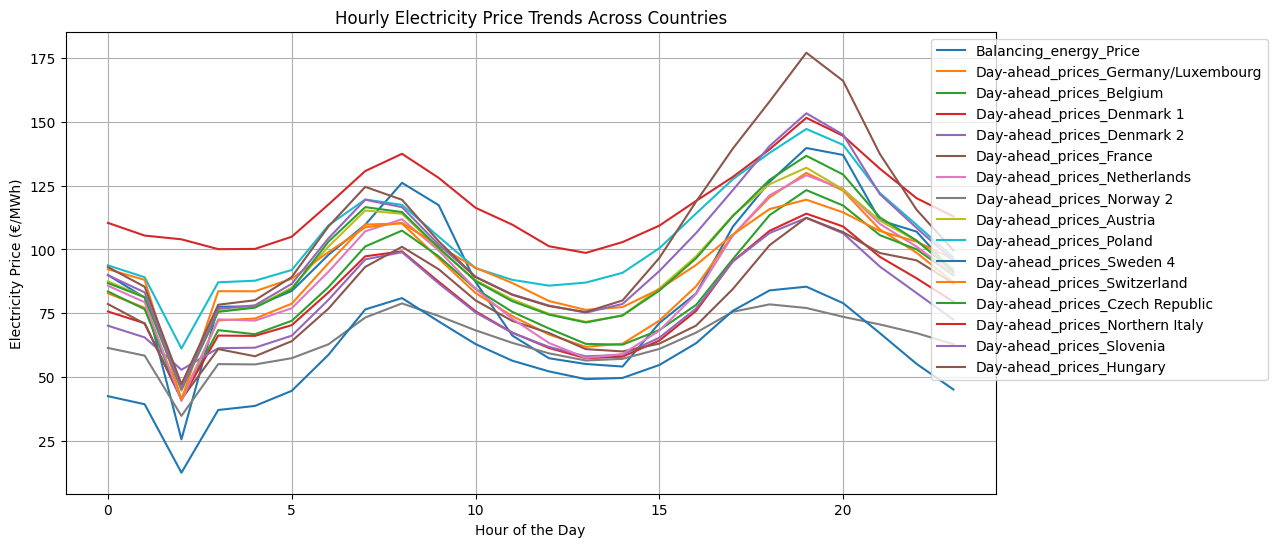

In [41]:
price_columns = [
    'Balancing_energy_Price [€/MWh] Original resolutions',
    'Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions',
    'Day-ahead_prices_Belgium [€/MWh] Original resolutions',
    'Day-ahead_prices_Denmark 1 [€/MWh] Original resolutions',
    'Day-ahead_prices_Denmark 2 [€/MWh] Original resolutions',
    'Day-ahead_prices_France [€/MWh] Original resolutions',
    'Day-ahead_prices_Netherlands [€/MWh] Original resolutions',
    'Day-ahead_prices_Norway 2 [€/MWh] Original resolutions',
    'Day-ahead_prices_Austria [€/MWh] Original resolutions',
    'Day-ahead_prices_Poland [€/MWh] Original resolutions',
    'Day-ahead_prices_Sweden 4 [€/MWh] Original resolutions',
    'Day-ahead_prices_Switzerland [€/MWh] Original resolutions',
    'Day-ahead_prices_Czech Republic [€/MWh] Original resolutions',
    'Day-ahead_prices_Northern Italy [€/MWh] Original resolutions',
    'Day-ahead_prices_Slovenia [€/MWh] Original resolutions',
    'Day-ahead_prices_Hungary [€/MWh] Original resolutions'
]

# Group by hour and compute mean price
hourly_prices = data.groupby('hour')[price_columns].mean()

# Plot hourly price fluctuations
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for col in price_columns:
    plt.plot(hourly_prices.index, hourly_prices[col], label=col.replace(' [€/MWh] Original resolutions', ''))

plt.xlabel("Hour of the Day")
plt.ylabel("Electricity Price (€/MWh)")
plt.title("Hourly Electricity Price Trends Across Countries")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()


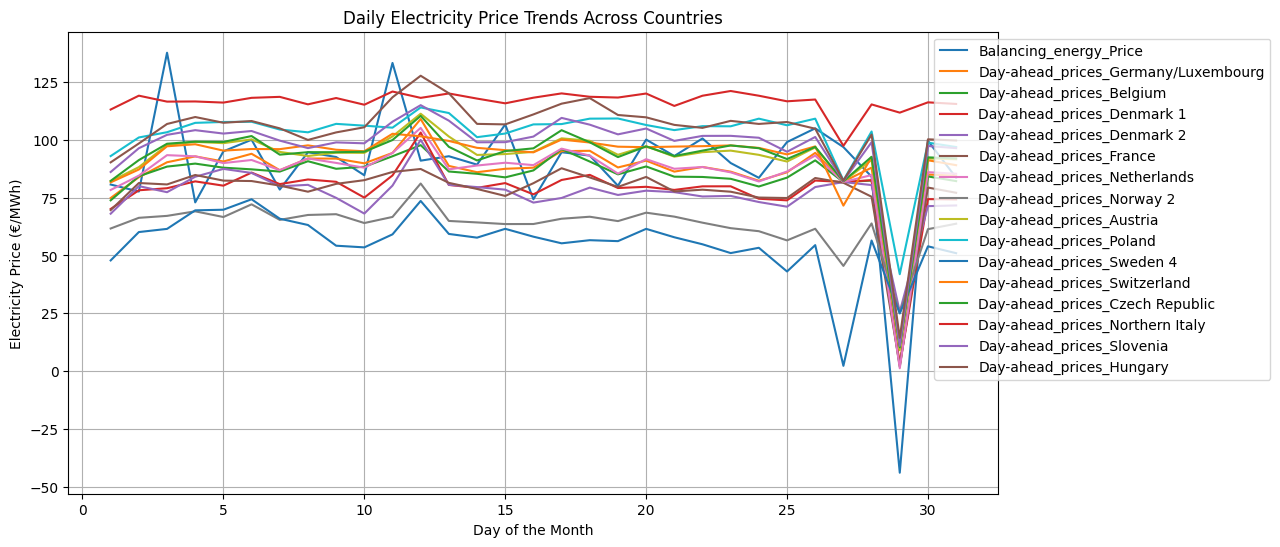

In [43]:
daily_prices = data.groupby('day')[price_columns].mean()

plt.figure(figsize=(12, 6))
for col in price_columns:
    plt.plot(daily_prices.index, daily_prices[col], label=col.replace(' [€/MWh] Original resolutions', ''))

plt.xlabel("Day of the Month")
plt.ylabel("Electricity Price (€/MWh)")
plt.title("Daily Electricity Price Trends Across Countries")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()


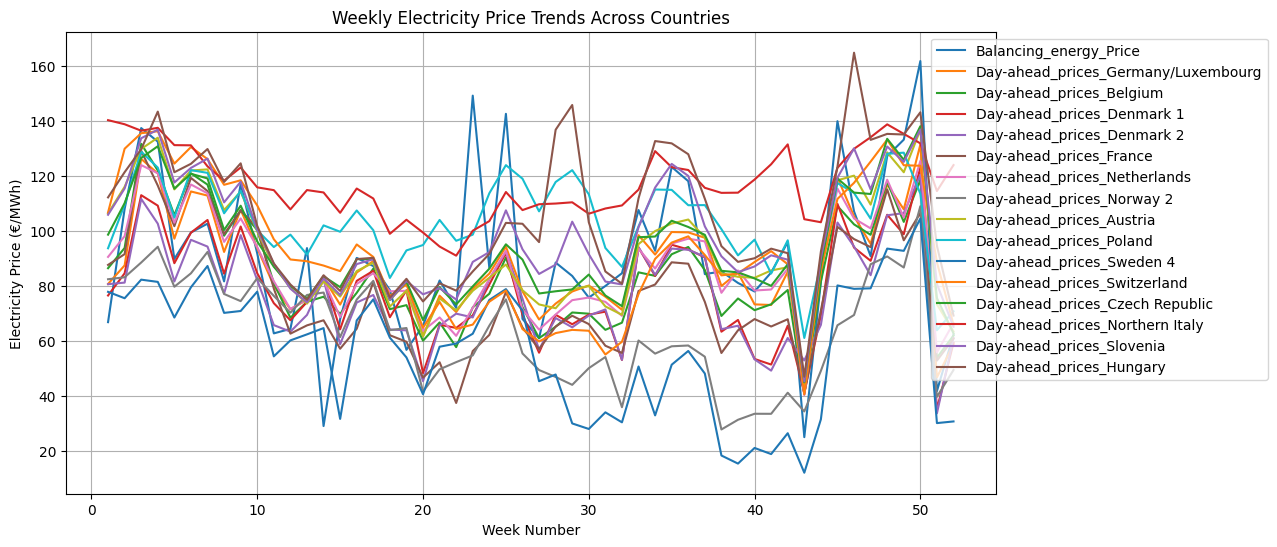

In [45]:
weekly_prices = data.groupby('week')[price_columns].mean()

plt.figure(figsize=(12, 6))
for col in price_columns:
    plt.plot(weekly_prices.index, weekly_prices[col], label=col.replace(' [€/MWh] Original resolutions', ''))

plt.xlabel("Week Number")
plt.ylabel("Electricity Price (€/MWh)")
plt.title("Weekly Electricity Price Trends Across Countries")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()


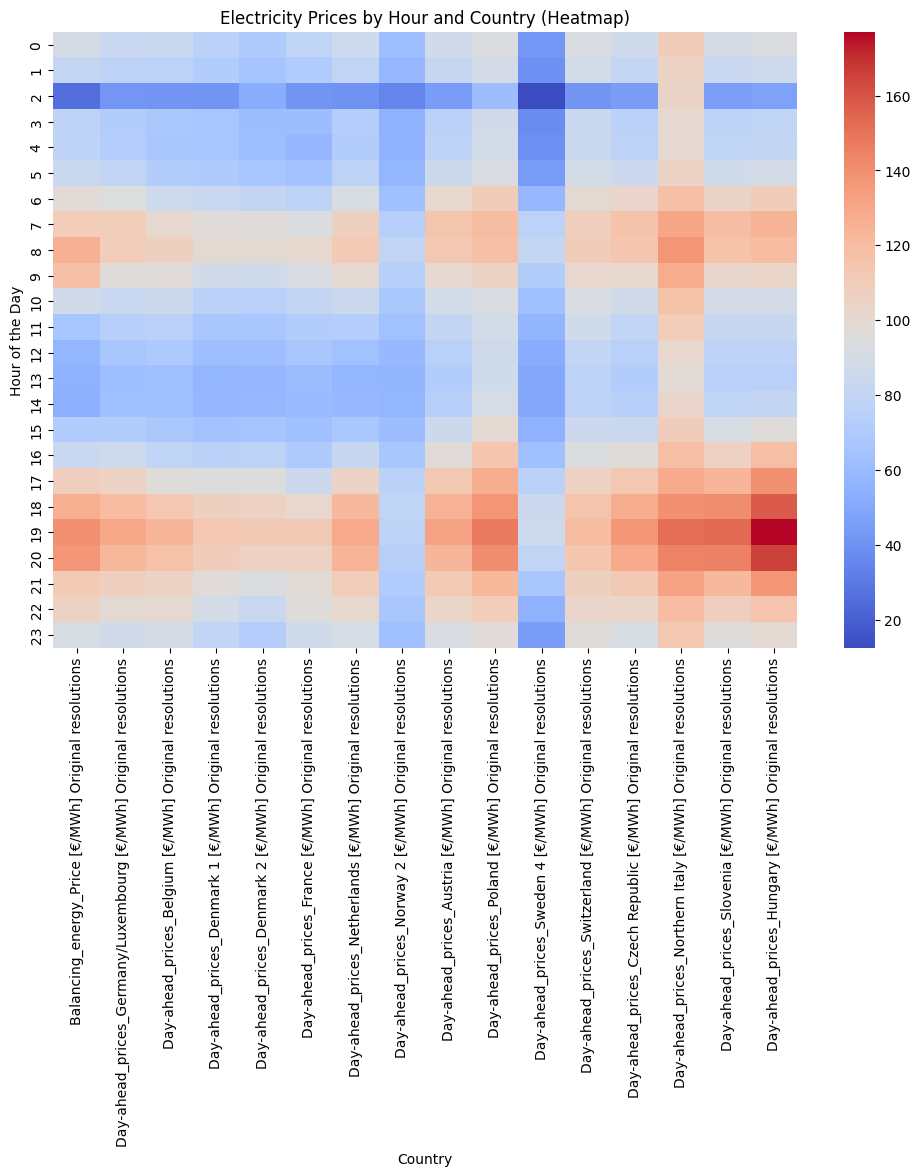

In [47]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(data.groupby('hour')[price_columns].mean(), cmap="coolwarm", annot=False)
plt.xlabel("Country")
plt.ylabel("Hour of the Day")
plt.title("Electricity Prices by Hour and Country (Heatmap)")
plt.show()


In [49]:
# How do electricity consumption patterns change in the same timeframes, and how does this impact pricing?

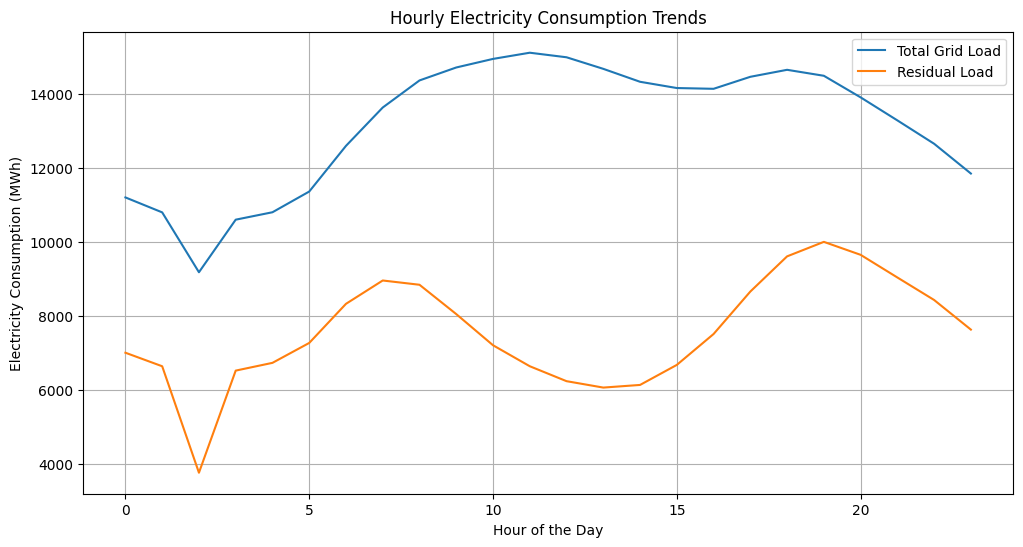

In [51]:
# Group by hour and compute mean consumption
hourly_consumption = data.groupby('hour')[
    ['Actual_consumption_Total (grid load) [MWh]', 'Actual_consumption_Residual load [MWh]']
].mean()

# Plot hourly consumption trends
plt.figure(figsize=(12, 6))
plt.plot(hourly_consumption.index, hourly_consumption['Actual_consumption_Total (grid load) [MWh]'], label="Total Grid Load")
plt.plot(hourly_consumption.index, hourly_consumption['Actual_consumption_Residual load [MWh]'], label="Residual Load")

plt.xlabel("Hour of the Day")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("Hourly Electricity Consumption Trends")
plt.legend()
plt.grid()
plt.show()


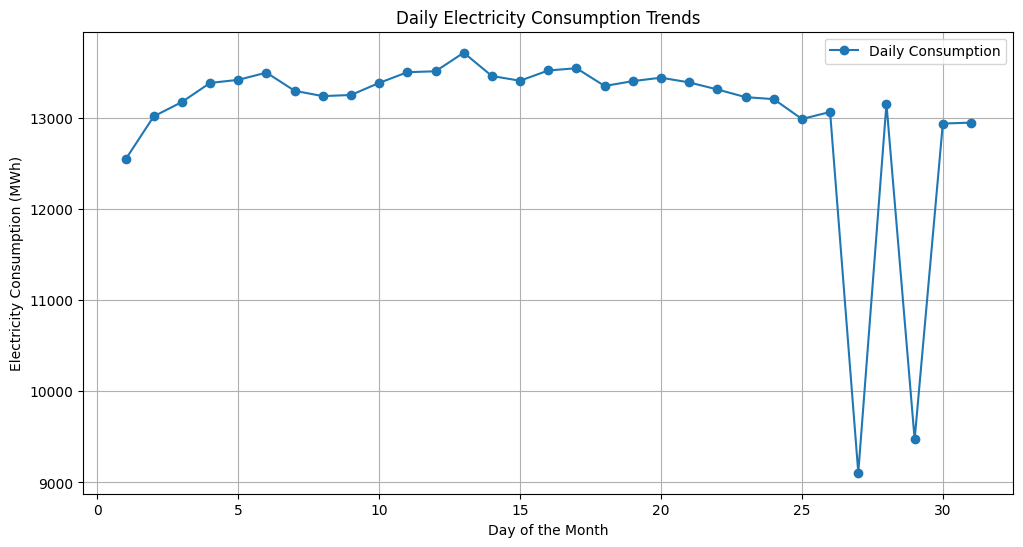

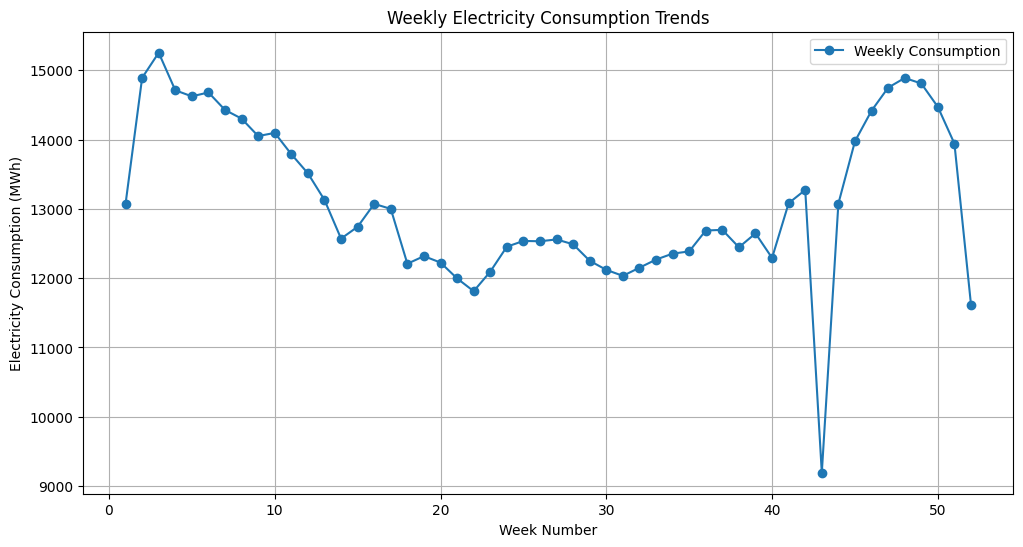

In [53]:
daily_consumption = data.groupby('day')[['Actual_consumption_Total (grid load) [MWh]']].mean()
weekly_consumption = data.groupby('week')[['Actual_consumption_Total (grid load) [MWh]']].mean()

# Plot daily and weekly trends
plt.figure(figsize=(12, 6))
plt.plot(daily_consumption.index, daily_consumption['Actual_consumption_Total (grid load) [MWh]'], label="Daily Consumption", marker='o')
plt.xlabel("Day of the Month")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("Daily Electricity Consumption Trends")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(weekly_consumption.index, weekly_consumption['Actual_consumption_Total (grid load) [MWh]'], label="Weekly Consumption", marker='o')
plt.xlabel("Week Number")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("Weekly Electricity Consumption Trends")
plt.legend()
plt.grid()
plt.show()


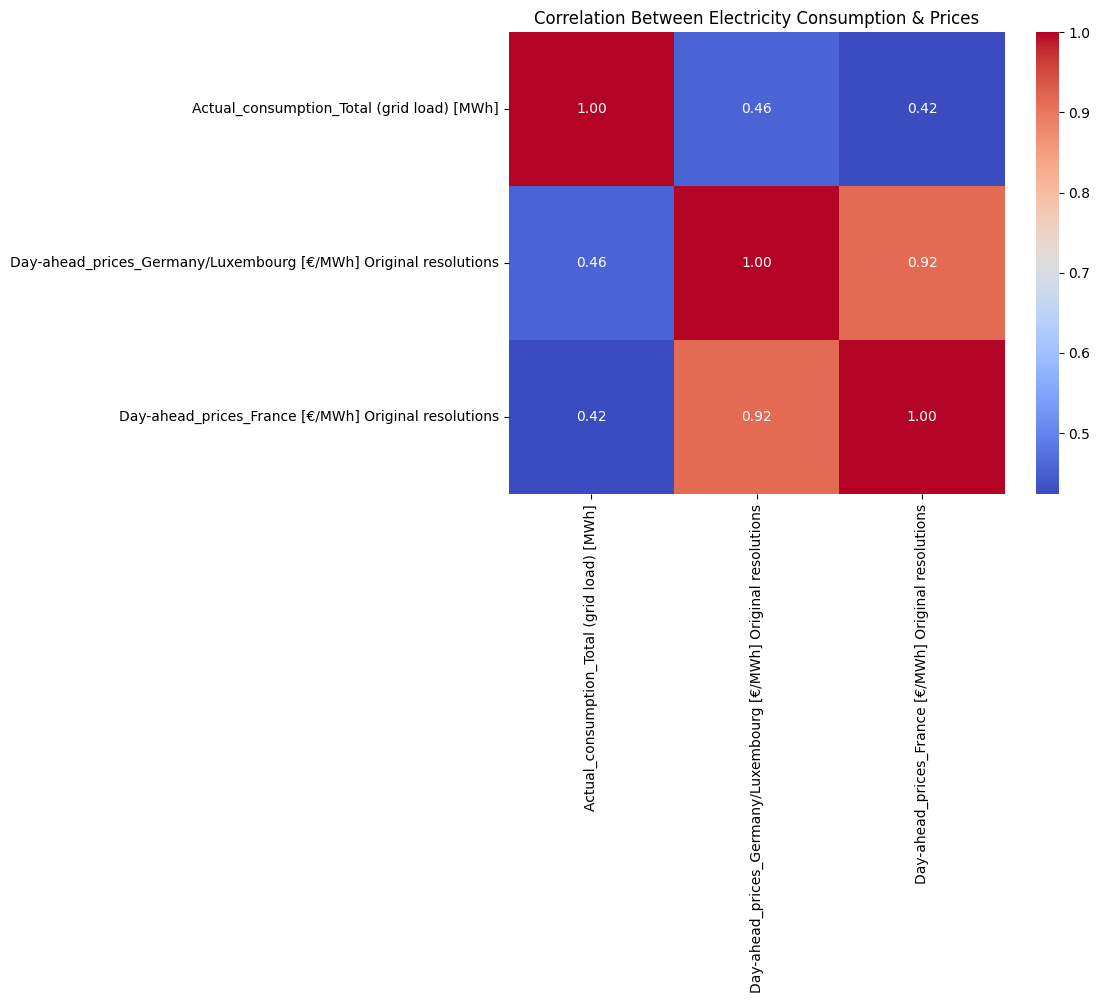

In [55]:
import seaborn as sns

# Select relevant columns
correlation_df = data[
    ['Actual_consumption_Total (grid load) [MWh]'] + 
    ['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions', 'Day-ahead_prices_France [€/MWh] Original resolutions']
]

# Compute correlations
correlation_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Electricity Consumption & Prices")
plt.show()


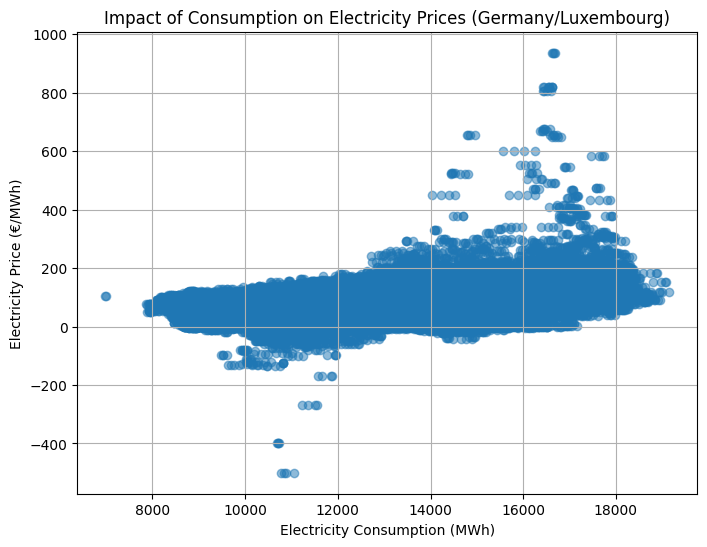

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(
    data['Actual_consumption_Total (grid load) [MWh]'],
    data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'],
    alpha=0.5
)
plt.xlabel("Electricity Consumption (MWh)")
plt.ylabel("Electricity Price (€/MWh)")
plt.title("Impact of Consumption on Electricity Prices (Germany/Luxembourg)")
plt.grid()
plt.show()


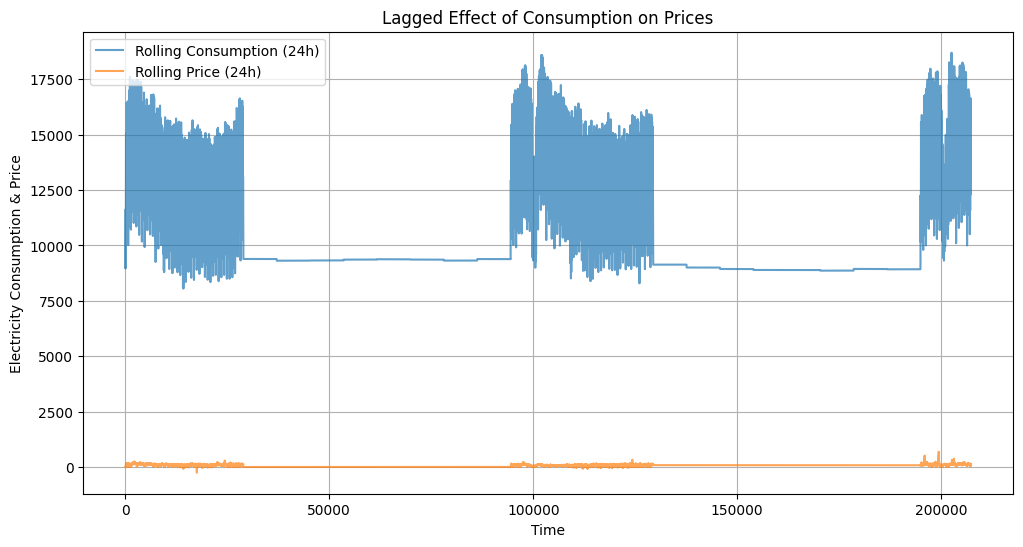

In [59]:
# Create rolling mean for smoothing
data['Rolling_Consumption'] = data['Actual_consumption_Total (grid load) [MWh]'].rolling(window=24).mean()
data['Rolling_Price'] = data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=24).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Rolling_Consumption'], label="Rolling Consumption (24h)", alpha=0.7)
plt.plot(data['Rolling_Price'], label="Rolling Price (24h)", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Electricity Consumption & Price")
plt.title("Lagged Effect of Consumption on Prices")
plt.legend()
plt.grid()
plt.show()


In [61]:
# How does electricity generation (actual vs. forecast) align with price trends?

In [63]:
import pandas as pd
import numpy as np

# Assuming df contains the data
data['Forecast_Error'] = (data['Forecasted_generation_Total [MWh]'] - data['Actual_generation_Total [MWh]']) / data['Actual_generation_Total [MWh]'] * 100

# Check summary statistics
data[['Actual_generation_Total [MWh]', 'Forecasted_generation_Total [MWh]', 'Forecast_Error']].describe()


Actual_generation_Total [MWh]  Forecasted_generation_Total [MWh]  \
count                  207280.000000                       51772.000000   
mean                    10682.018015                       42337.611547   
std                      2502.079307                        9694.446721   
min                         0.000000                       20000.000000   
25%                      8662.000000                       34075.000000   
50%                     10619.500000                       41164.000000   
75%                     11242.750000                       44140.750000   
max                     21652.000000                       86901.000000   

       Forecast_Error  
count    5.177200e+04  
mean              inf  
std               NaN  
min      2.182772e+02  
25%      2.827469e+02  
50%      2.944296e+02  
75%      3.030737e+02  
max               inf

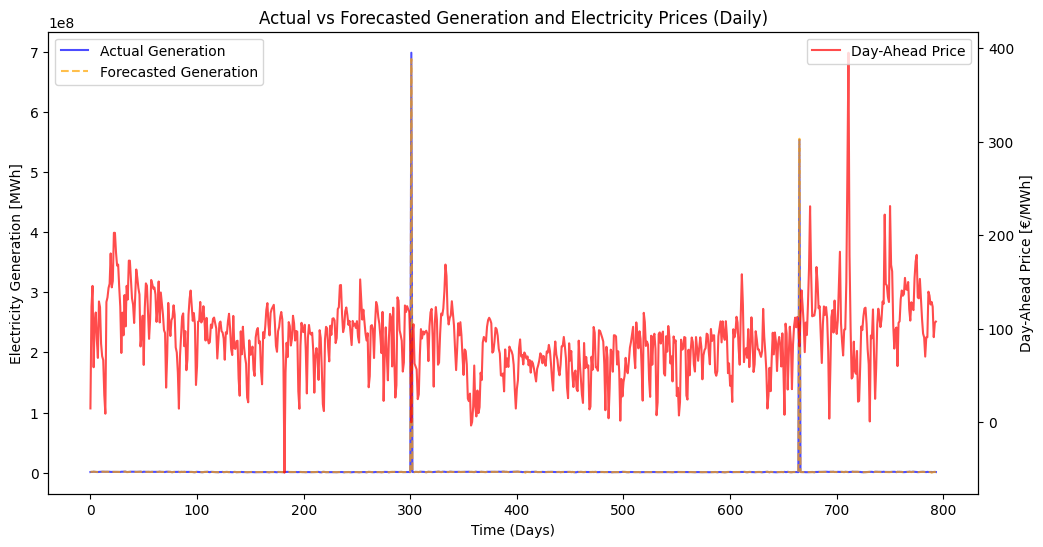

In [65]:
import matplotlib.pyplot as plt

# Group data by day and aggregate
daily_data = data.groupby(['year', 'month', 'day']).agg({
    'Actual_generation_Total [MWh]': 'sum',
    'Forecasted_generation_Total [MWh]': 'sum',
    'Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions': 'mean'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_data.index, daily_data['Actual_generation_Total [MWh]'], label='Actual Generation', color='blue', alpha=0.7)
ax1.plot(daily_data.index, daily_data['Forecasted_generation_Total [MWh]'], label='Forecasted Generation', color='orange', linestyle='dashed', alpha=0.7)
ax1.set_ylabel("Electricity Generation [MWh]")
ax1.set_xlabel("Time (Days)")
ax1.legend(loc='upper left')

# Secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'], label='Day-Ahead Price', color='red', alpha=0.7)
ax2.set_ylabel("Day-Ahead Price [€/MWh]")
ax2.legend(loc='upper right')

plt.title("Actual vs Forecasted Generation and Electricity Prices (Daily)")
plt.show()


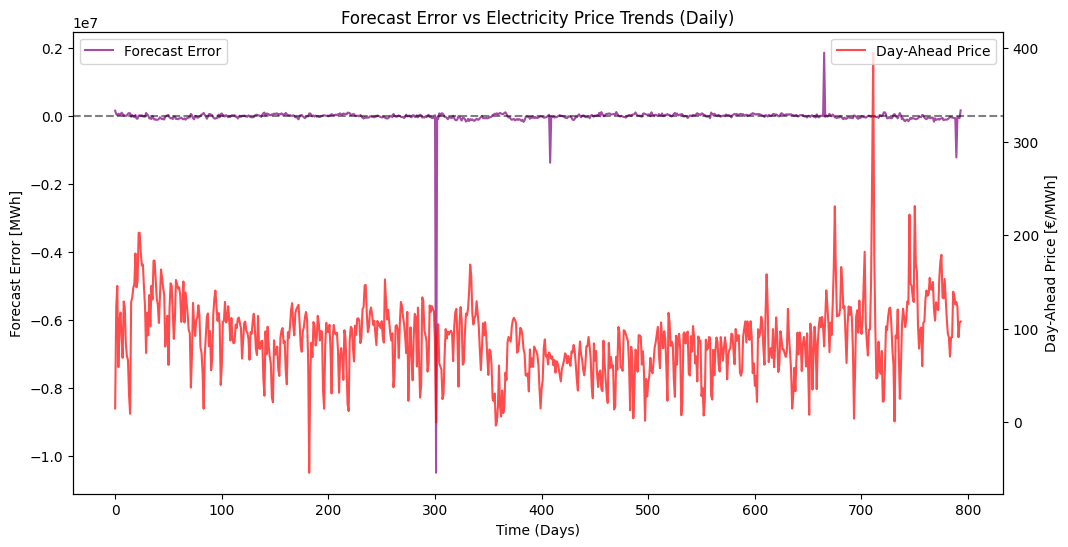

In [67]:
# Compute daily forecast error
daily_data['Forecast_Error'] = daily_data['Forecasted_generation_Total [MWh]'] - daily_data['Actual_generation_Total [MWh]']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_data.index, daily_data['Forecast_Error'], label='Forecast Error', color='purple', alpha=0.7)
ax1.set_ylabel("Forecast Error [MWh]")
ax1.set_xlabel("Time (Days)")
ax1.axhline(y=0, color='black', linestyle='dashed', alpha=0.5)
ax1.legend(loc='upper left')

# Secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'], label='Day-Ahead Price', color='red', alpha=0.7)
ax2.set_ylabel("Day-Ahead Price [€/MWh]")
ax2.legend(loc='upper right')

plt.title("Forecast Error vs Electricity Price Trends (Daily)")
plt.show()


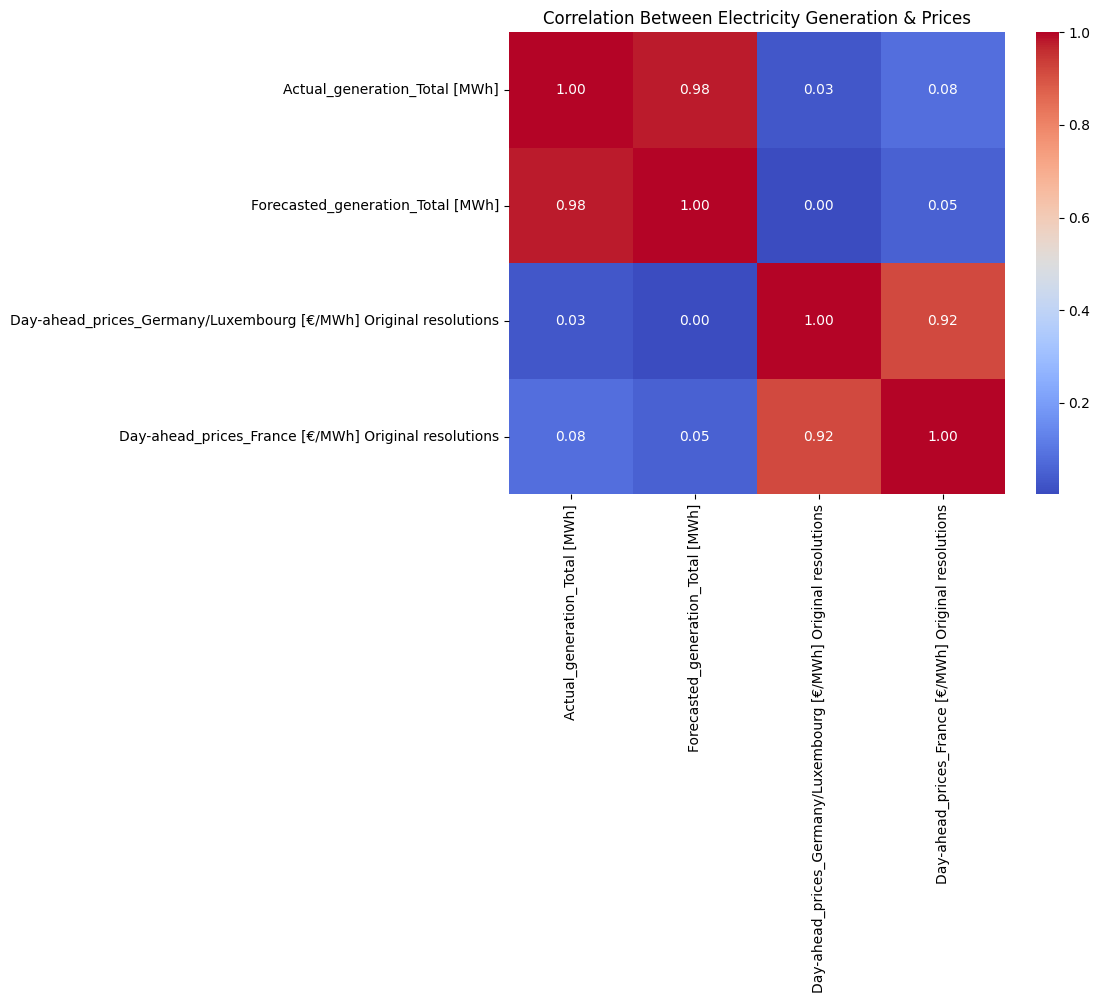

In [69]:
import seaborn as sns

# Select relevant columns
correlation_df = data[
    ['Actual_generation_Total [MWh]', 'Forecasted_generation_Total [MWh]'] + 
    ['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions', 'Day-ahead_prices_France [€/MWh] Original resolutions']
]

# Compute correlations
correlation_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Electricity Generation & Prices")
plt.show()


In [71]:
# What patterns emerge from scheduled commercial exchanges and cross-border physical flows?

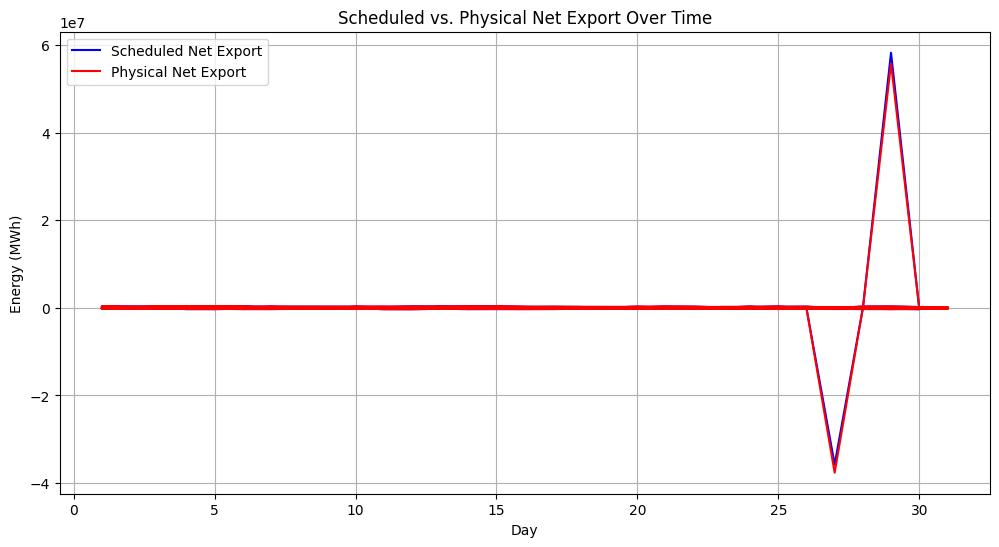

In [73]:
import matplotlib.pyplot as plt

# Group by day to reduce data volume
grouped_data = data.groupby(['year', 'month', 'day']).sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(grouped_data['day'], grouped_data['Scheduled_commercial_exchanges_Net export [MWh]'], label='Scheduled Net Export', color='blue')
plt.plot(grouped_data['day'], grouped_data['Cross-border_physical_flows_Net export [MWh] Original resolutions'], label='Physical Net Export', color='red')

plt.xlabel('Day')
plt.ylabel('Energy (MWh)')
plt.title('Scheduled vs. Physical Net Export Over Time')
plt.legend()
plt.grid()
plt.show()


C:\Users\yunus\AppData\Local\Temp\ipykernel_20836\620463788.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flow_df, x='Country', y='Net Flow (MWh)', palette='coolwarm')


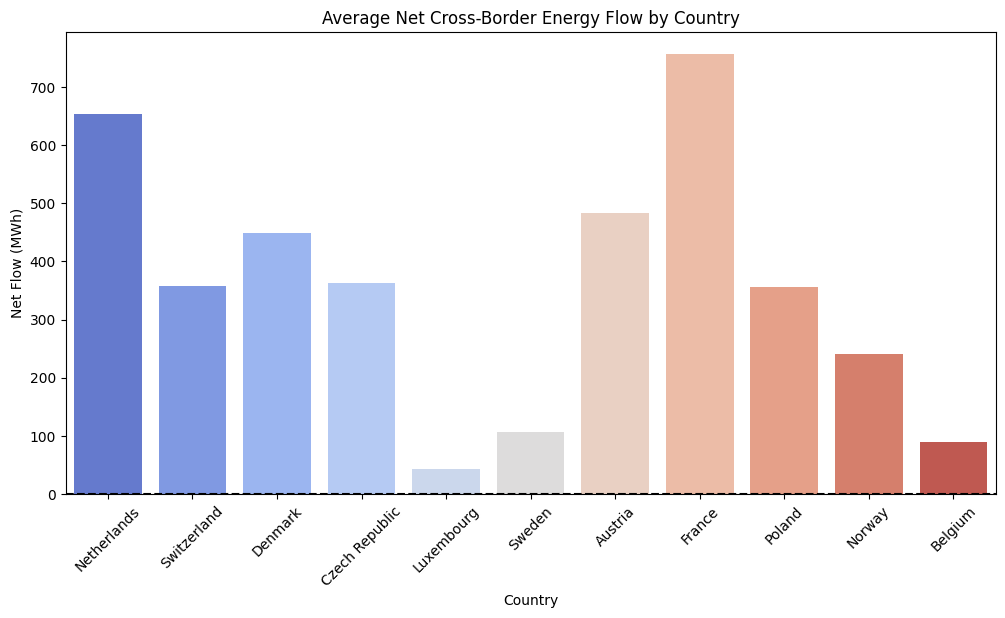

In [75]:
import seaborn as sns

# Select relevant columns for net flow balance (exports - imports)
countries = ['Netherlands', 'Switzerland', 'Denmark', 'Czech Republic', 'Luxembourg', 'Sweden', 
             'Austria', 'France', 'Poland', 'Norway', 'Belgium']

net_flows = {}

for country in countries:
    export_col = f'Cross-border_physical_flows_{country} (export) [MWh] Original resolutions'
    import_col = f'Cross-border_physical_flows_{country} (import) [MWh] Original resolutions'
    
    if export_col in data.columns and import_col in data.columns:
        net_flows[country] = (data[export_col] - data[import_col]).mean()

# Convert to DataFrame
flow_df = pd.DataFrame(net_flows.items(), columns=['Country', 'Net Flow (MWh)'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=flow_df, x='Country', y='Net Flow (MWh)', palette='coolwarm')
plt.axhline(0, color='black', linestyle='dashed')
plt.title('Average Net Cross-Border Energy Flow by Country')
plt.xticks(rotation=45)
plt.show()


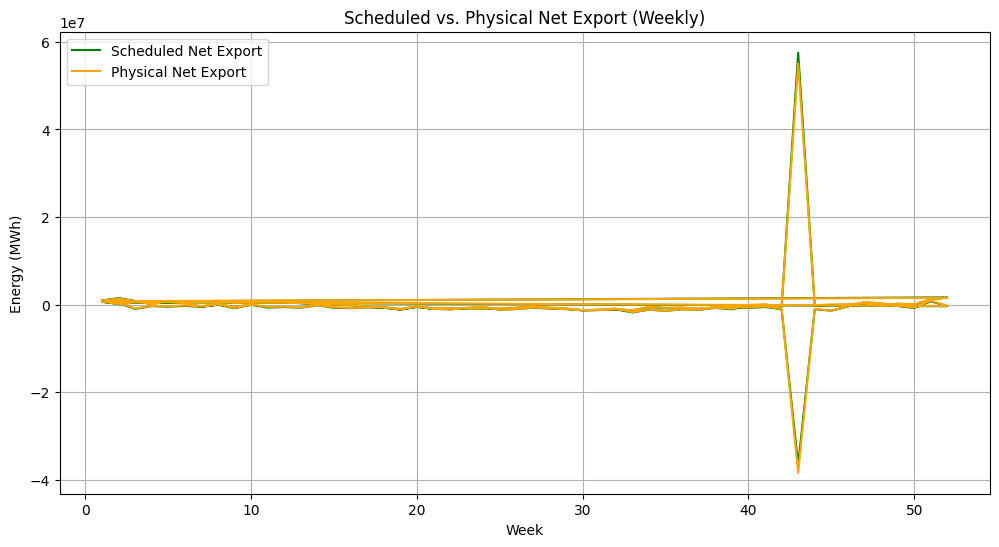

In [77]:
# Group by week to reduce data size
weekly_data = data.groupby(['year', 'week']).sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data['week'], weekly_data['Scheduled_commercial_exchanges_Net export [MWh]'], label='Scheduled Net Export', color='green')
plt.plot(weekly_data['week'], weekly_data['Cross-border_physical_flows_Net export [MWh] Original resolutions'], label='Physical Net Export', color='orange')

plt.xlabel('Week')
plt.ylabel('Energy (MWh)')
plt.title('Scheduled vs. Physical Net Export (Weekly)')
plt.legend()
plt.grid()
plt.show()


In [79]:
# Correlation & Feature Relationships

In [81]:
# What features have the strongest correlation with electricity prices?

C:\Users\yunus\AppData\Local\Temp\ipykernel_20836\4278017684.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_features.index, x=top_features.values, palette="coolwarm")


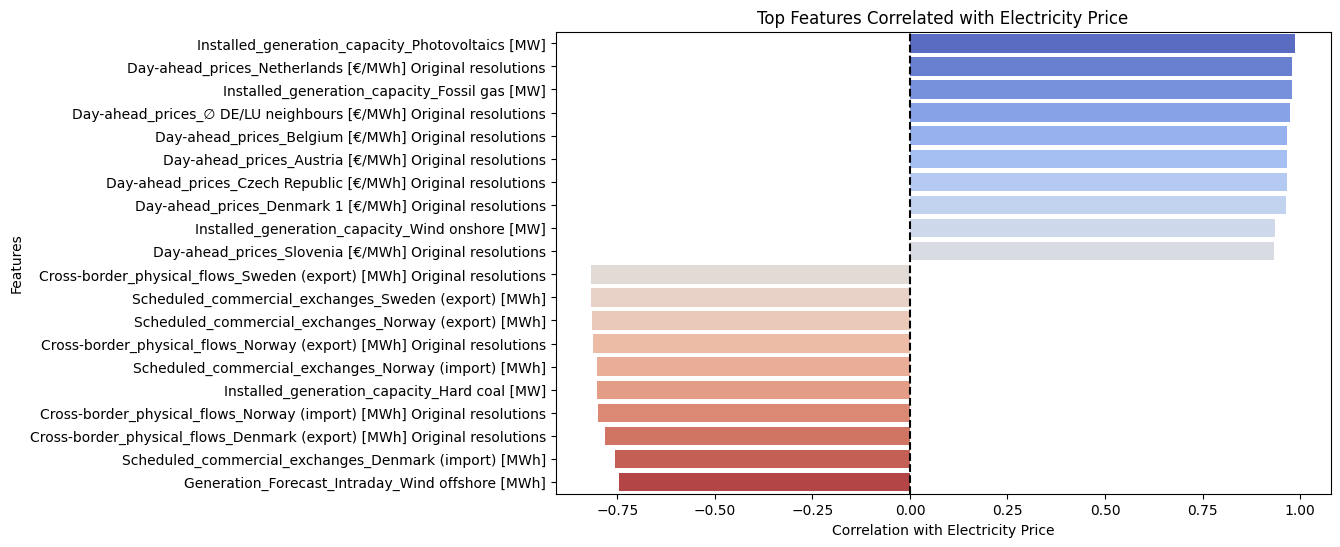

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix with electricity price
price_corr = numeric_data.corr()['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'].dropna()

# Get top positively and negatively correlated features
top_pos_corr = price_corr.sort_values(ascending=False).iloc[1:11]  # Exclude self-correlation
top_neg_corr = price_corr.sort_values(ascending=True).iloc[:10]

# Combine results
top_features = pd.concat([top_pos_corr, top_neg_corr])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.barplot(y=top_features.index, x=top_features.values, palette="coolwarm")
plt.axvline(0, color='black', linestyle='dashed')
plt.xlabel('Correlation with Electricity Price')
plt.ylabel('Features')
plt.title('Top Features Correlated with Electricity Price')
plt.show()


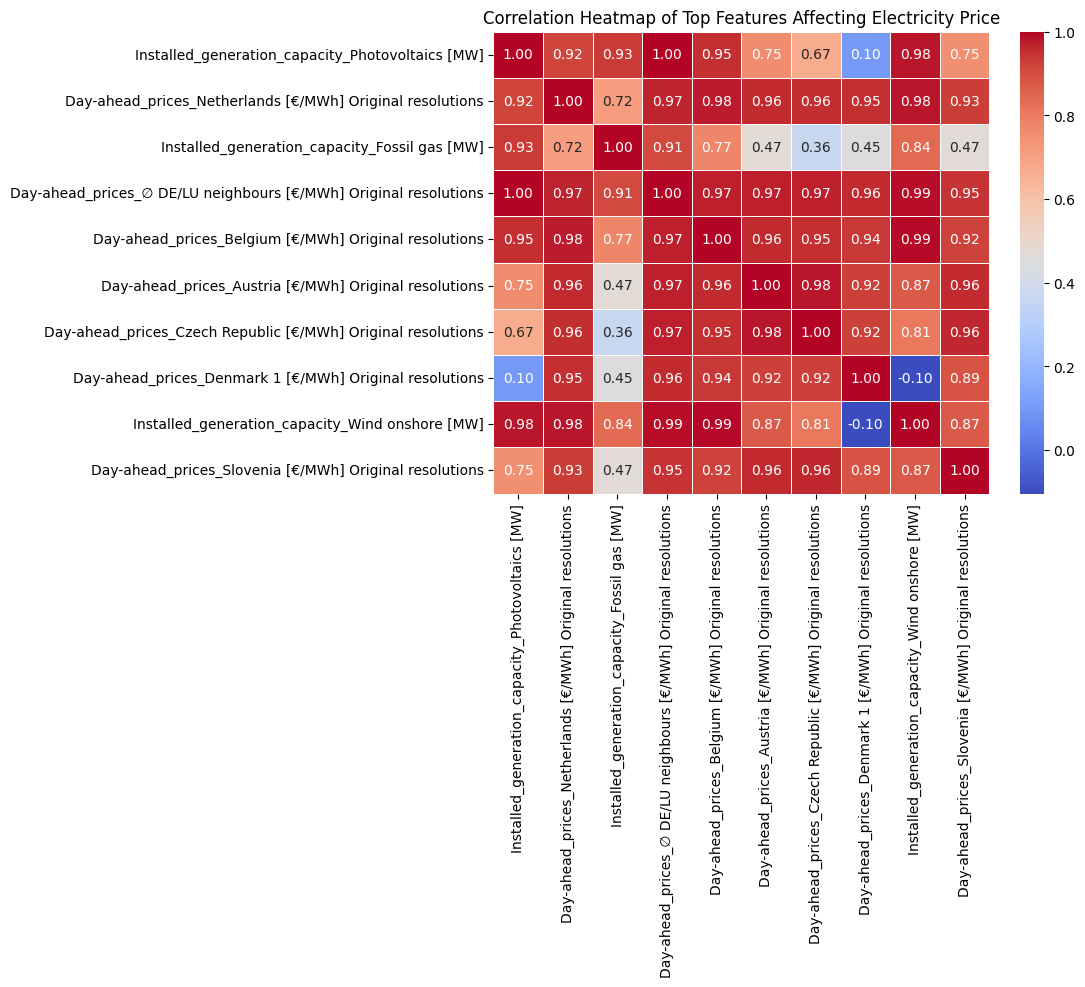

In [87]:
import numpy as np

# Select top absolute correlated features
top_corr_features = price_corr.abs().sort_values(ascending=False).iloc[1:11].index

# Compute correlation matrix for top features
corr_matrix = numeric_data[top_corr_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Top Features Affecting Electricity Price')
plt.show()


In [89]:
corr_matrix

Installed_generation_capacity_Photovoltaics [MW]  \
Installed_generation_capacity_Photovoltaics [MW]                                            1.000000   
Day-ahead_prices_Netherlands [€/MWh] Original r...                                          0.917304   
Installed_generation_capacity_Fossil gas [MW]                                               0.934285   
Day-ahead_prices_∅ DE/LU neighbours [€/MWh] Ori...                                          0.997324   
Day-ahead_prices_Belgium [€/MWh] Original resol...                                          0.949279   
Day-ahead_prices_Austria [€/MWh] Original resol...                                          0.754536   
Day-ahead_prices_Czech Republic [€/MWh] Origina...                                          0.672246   
Day-ahead_prices_Denmark 1 [€/MWh] Original res...                                          0.100495   
Installed_generation_capacity_Wind onshore [MW]                                             0.979094   
Day-ahead_prices_Slovenia [€/MWh] Original reso...                                          0.753411   

                                                    Day-ahead_prices_Netherlands [€/MWh] Original resolutions  \
Installed_generation_capacity_Photovoltaics [MW]                                             0.917304           
Day-ahead_prices_Netherlands [€/MWh] Original r...                                           1.000000           
Installed_generation_capacity_Fossil gas [MW]                                                0.715058           
Day-ahead_prices_∅ DE/LU neighbours [€/MWh] Ori...                                           0.969740           
Day-ahead_prices_Belgium [€/MWh] Original resol...                                           0.975951           
Day-ahead_prices_Austria [€/MWh] Original resol...                                           0.958262           
Day-ahead_prices_Czech Republic [€/MWh] Origina...                                           0.955145           
Day-ahead_prices_Denmark 1 [€/MWh] Original res...                                           0.948698           
Installed_generation_capacity_Wind onshore [MW]                                              0.979121           
Day-ahead_prices_Slovenia [€/MWh] Original reso...                                           0.927092           

                                                    Installed_generation_capacity_Fossil gas [MW]  \
Installed_generation_capacity_Photovoltaics [MW]                                         0.934285   
Day-ahead_prices_Netherlands [€/MWh] Original r...                                       0.715058   
Installed_generation_capacity_Fossil gas [MW]                                            1.000000   
Day-ahead_prices_∅ DE/LU neighbours [€/MWh] Ori...                                       0.905721   
Day-ahead_prices_Belgium [€/MWh] Original resol...                                       0.774793   
Day-ahead_prices_Austria [€/MWh] Original resol...                                       0.470977   
Day-ahead_prices_Czech Republic [€/MWh] Origina...                                       0.364121   
Day-ahead_prices_Denmark 1 [€/MWh] Original res...                                       0.448614   
Installed_generation_capacity_Wind onshore [MW]                                          0.842233   
Day-ahead_prices_Slovenia [€/MWh] Original reso...                                       0.469465   

                                                    Day-ahead_prices_∅ DE/LU neighbours [€/MWh] Original resolutions  \
Installed_generation_capacity_Photovoltaics [MW]                                             0.997324                  
Day-ahead_prices_Netherlands [€/MWh] Original r...                                           0.969740                  
Installed_generation_capacity_Fossil gas [MW]                                                0.905721                  
Day-ahead_prices_∅ DE/LU neighbours [€/MWh] Ori...                     

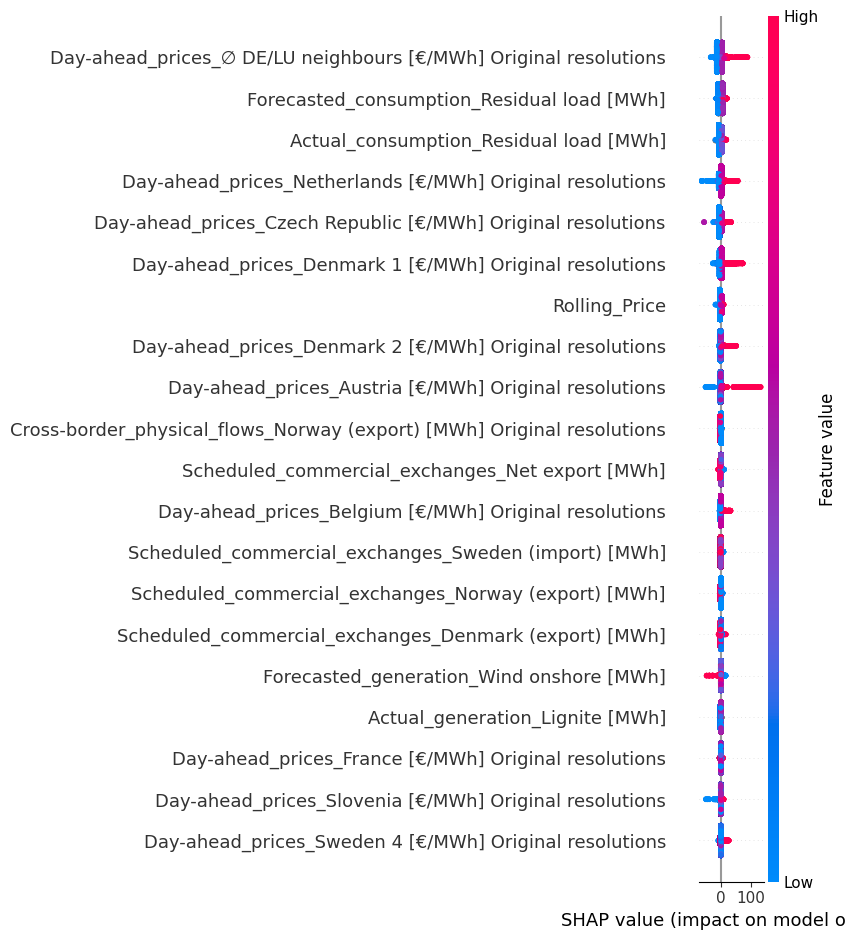

In [91]:
import shap

# Train a simple CatBoost model for feature importance
from catboost import CatBoostRegressor

features = numeric_data.drop(columns=['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'])
target = numeric_data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions']

model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, silent=True)
model.fit(features, target)

# Explain model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(features)

# Summary plot
shap.summary_plot(shap_values, features)


In [95]:
# How do electricity prices correlate between different countries?

In [97]:
# List of day-ahead price columns for different countries
price_columns = [
    'Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions',
    'Day-ahead_prices_∅ DE/LU neighbours [€/MWh] Original resolutions',
    'Day-ahead_prices_Belgium [€/MWh] Original resolutions',
    'Day-ahead_prices_Denmark 1 [€/MWh] Original resolutions',
    'Day-ahead_prices_Denmark 2 [€/MWh] Original resolutions',
    'Day-ahead_prices_France [€/MWh] Original resolutions',
    'Day-ahead_prices_Netherlands [€/MWh] Original resolutions',
    'Day-ahead_prices_Norway 2 [€/MWh] Original resolutions',
    'Day-ahead_prices_Austria [€/MWh] Original resolutions',
    'Day-ahead_prices_Poland [€/MWh] Original resolutions',
    'Day-ahead_prices_Sweden 4 [€/MWh] Original resolutions',
    'Day-ahead_prices_Switzerland [€/MWh] Original resolutions',
    'Day-ahead_prices_Czech Republic [€/MWh] Original resolutions',
    'Day-ahead_prices_Northern Italy [€/MWh] Original resolutions',
    'Day-ahead_prices_Slovenia [€/MWh] Original resolutions',
    'Day-ahead_prices_Hungary [€/MWh] Original resolutions'
]

# Subset the data to only include day-ahead price columns
price_data = data[price_columns]


In [99]:
# Compute the correlation matrix for day-ahead prices
price_corr_matrix = price_data.corr()


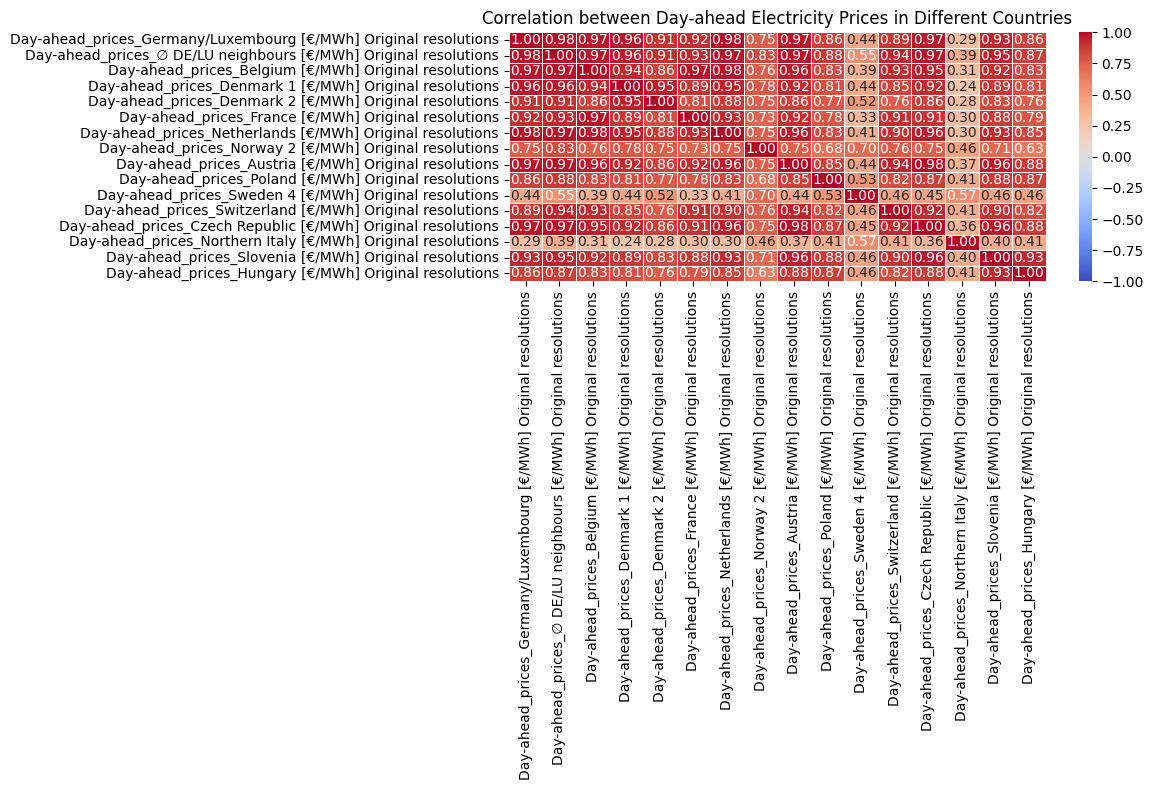

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(price_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation between Day-ahead Electricity Prices in Different Countries')
plt.tight_layout()
plt.show()


In [103]:
price_corr_matrix

Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions  \
Day-ahead_prices_Germany/Luxembourg [€/MWh] Ori...                                           1.000000                  
Day-ahead_prices_∅ DE/LU neighbours [€/MWh] Ori...                                           0.975180                  
Day-ahead_prices_Belgium [€/MWh] Original resol...                                           0.966526                  
Day-ahead_prices_Denmark 1 [€/MWh] Original res...                                           0.964499                  
Day-ahead_prices_Denmark 2 [€/MWh] Original res...                                           0.905943                  
Day-ahead_prices_France [€/MWh] Original resolu...                                           0.915715                  
Day-ahead_prices_Netherlands [€/MWh] Original r...                                           0.980121                  
Day-ahead_prices_Norway 2 [€/MWh] Original reso...                                           0.753831                  
Day-ahead_prices_Austria [€/MWh] Original resol...                                           0.965548                  
Day-ahead_prices_Poland [€/MWh] Original resolu...                                           0.857068                  
Day-ahead_prices_Sweden 4 [€/MWh] Original reso...                                           0.437018                  
Day-ahead_prices_Switzerland [€/MWh] Original r...                                           0.892704                  
Day-ahead_prices_Czech Republic [€/MWh] Origina...                                           0.965426                  
Day-ahead_prices_Northern Italy [€/MWh] Origina...                                           0.293878                  
Day-ahead_prices_Slovenia [€/MWh] Original reso...                                           0.934436                  
Day-ahead_prices_Hungary [€/MWh] Original resol...                                           0.856572                  

                                                    Day-ahead_prices_∅ DE/LU neighbours [€/MWh] Original resolutions  \
Day-ahead_prices_Germany/Luxembourg [€/MWh] Ori...                                           0.975180                  
Day-ahead_prices_∅ DE/LU neighbours [€/MWh] Ori...                                           1.000000                  
Day-ahead_prices_Belgium [€/MWh] Original resol...                                           0.970974                  
Day-ahead_prices_Denmark 1 [€/MWh] Original res...                                           0.957528                  
Day-ahead_prices_Denmark 2 [€/MWh] Original res...                                           0.910643                  
Day-ahead_prices_France [€/MWh] Original resolu...                                           0.934885                  
Day-ahead_prices_Netherlands [€/MWh] Original r...                                           0.969740                  
Day-ahead_prices_Norway 2 [€/MWh] Original reso...                                           0.834368                  
Day-ahead_prices_Austria [€/MWh] Original resol...                                           0.973922                  
Day-ahead_prices_Poland [€/MWh] Original resolu...                                           0.883865                  
Day-ahead_prices_Sweden 4 [€/MWh] Original reso...                                           0.548434                  
Day-ahead_prices_Switzerland [€/MWh] Original r...                                           0.937787                  
Day-ahead_prices_Czech Republic [€/MWh] Origina...                                           0.971328                  
Day-ahead_prices_Northern Italy [€/MWh] Origina...                                           0.392278                  
Day-ahead_prices_Slovenia [€/MWh] Original reso...                                           0.945110                  
Day-ahead_prices_Hungary [€/MWh] Original resol...                                         

In [105]:
"""
To interpret the correlation matrix for electricity prices across different countries, let's break down some key patterns:

### 1. **High Correlations (Strong Relationships)**
   - **Germany/Luxembourg and their Neighbors:**
     - The **Day-ahead prices for Germany/Luxembourg** have very strong correlations (above 0.9) with neighboring countries like **Belgium**, **France**, **Netherlands**, **Austria**, and others.
     - For example:
       - Germany/Luxembourg vs. Belgium: **0.97**
       - Germany/Luxembourg vs. Netherlands: **0.98**
       - Germany/Luxembourg vs. Austria: **0.97**
     - This indicates that electricity prices in Germany/Luxembourg are closely linked with these countries' prices, suggesting that the energy markets of these countries are highly integrated.

   - **France, Belgium, and Netherlands**:
     - Prices in these countries show similarly high correlations with each other, suggesting a strong interconnection in their electricity markets.
     - For example:
       - France vs. Netherlands: **0.93**
       - France vs. Belgium: **0.97**
     - These countries are likely sharing resources and experiencing similar price fluctuations, which can be attributed to factors like cross-border energy flows and market policies.

### 2. **Moderate to Low Correlations**
   - **Poland** and **Denmark**:
     - While the correlations are still relatively high, they are lower than the ones between the more closely connected countries.
     - For example:
       - Poland vs. Germany/Luxembourg: **0.86**
       - Denmark vs. Germany/Luxembourg: **0.91**
     - These countries may be part of the broader European grid but less tightly coupled in terms of energy prices, possibly due to different energy generation mixes (e.g., Denmark’s wind power, Poland’s reliance on coal).

   - **Sweden, Switzerland, and Other Peripheral Countries**:
     - These countries show more moderate correlations with others.
     - For instance:
       - Sweden vs. Germany/Luxembourg: **0.44**
       - Switzerland vs. Germany/Luxembourg: **0.89**
     - **Sweden** seems less correlated with others, which may be due to its different energy generation system, especially its reliance on hydropower and other renewable sources. 
     - **Switzerland**, while having some correlation with other countries, is also influenced by its unique energy market.

### 3. **Low Correlations**
   - **Northern Italy, Hungary, and Slovenia**:
     - The correlations with Germany/Luxembourg are relatively weak.
     - For example:
       - Italy vs. Germany/Luxembourg: **0.29**
       - Hungary vs. Germany/Luxembourg: **0.86**
     - **Italy** in particular shows a low correlation with other countries, suggesting its market is more independent or influenced by different energy dynamics, such as imports from non-EU countries or local generation characteristics.

### 4. **Key Insights and Considerations**
   - **Regional Energy Integration**: The strong correlations between Germany, Luxembourg, Belgium, France, and the Netherlands suggest a highly integrated energy market within the Central European region. The interconnectedness of these countries’ electricity grids and the shared market mechanisms likely contribute to the similar pricing trends.
   - **Different Market Drivers**: Countries with lower correlations (like **Sweden** and **Italy**) may be influenced by different factors, such as local energy generation, energy policies, or energy imports, which may decouple them from the broader European market.
   - **Cross-Border Flows**: High correlations between neighboring countries (e.g., Germany/Luxembourg vs. France, Netherlands) reflect the role of cross-border electricity flows. This could imply that energy pricing is influenced by imports and exports between these countries, with market operators balancing supply-demand across borders.

### To Conclude:
The matrix shows strong regional coherence in electricity prices, particularly among Central European countries, indicating significant interconnections and energy sharing. Countries with low correlations may have unique market factors at play, such as reliance on renewables or independent energy policies.
"""

"\nTo interpret the correlation matrix for electricity prices across different countries, let's break down some key patterns:\n\n### 1. **High Correlations (Strong Relationships)**\n   - **Germany/Luxembourg and their Neighbors:**\n     - The **Day-ahead prices for Germany/Luxembourg** have very strong correlations (above 0.9) with neighboring countries like **Belgium**, **France**, **Netherlands**, **Austria**, and others.\n     - For example:\n       - Germany/Luxembourg vs. Belgium: **0.97**\n       - Germany/Luxembourg vs. Netherlands: **0.98**\n       - Germany/Luxembourg vs. Austria: **0.97**\n     - This indicates that electricity prices in Germany/Luxembourg are closely linked with these countries' prices, suggesting that the energy markets of these countries are highly integrated.\n\n   - **France, Belgium, and Netherlands**:\n     - Prices in these countries show similarly high correlations with each other, suggesting a strong interconnection in their electricity markets.\n  

In [107]:
# What is the relationship between forecasted vs. actual electricity generation and consumption?

In [109]:
# Calculate the difference between forecasted and actual values
data['Gen_diff'] = data['Actual_generation_Total [MWh]'] - data['Forecasted_generation_Total [MWh]']
data['Cons_diff'] = data['Actual_consumption_Total (grid load) [MWh]'] - data['Forecasted_consumption_Total (grid load) [MWh]']


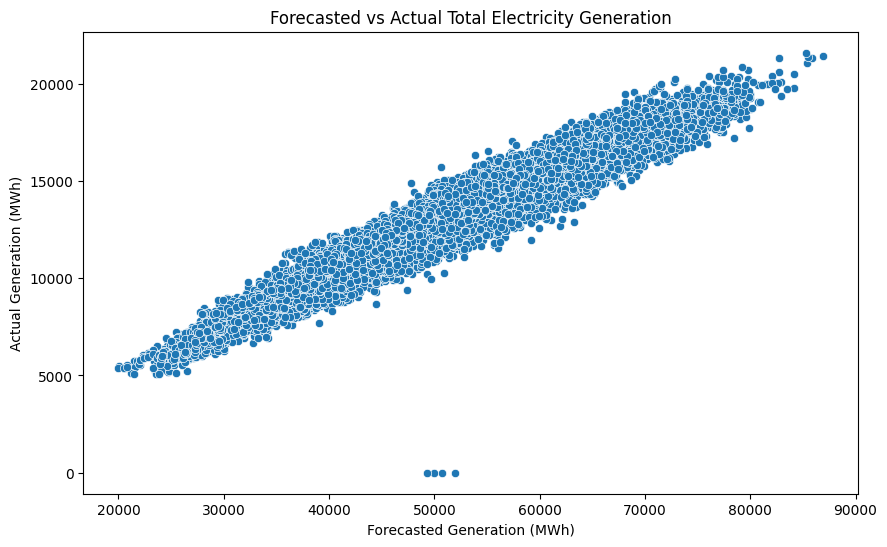

In [111]:
# Scatter Plot for Total Generation

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Forecasted_generation_Total [MWh]'], y=data['Actual_generation_Total [MWh]'])
plt.title('Forecasted vs Actual Total Electricity Generation')
plt.xlabel('Forecasted Generation (MWh)')
plt.ylabel('Actual Generation (MWh)')
plt.show()


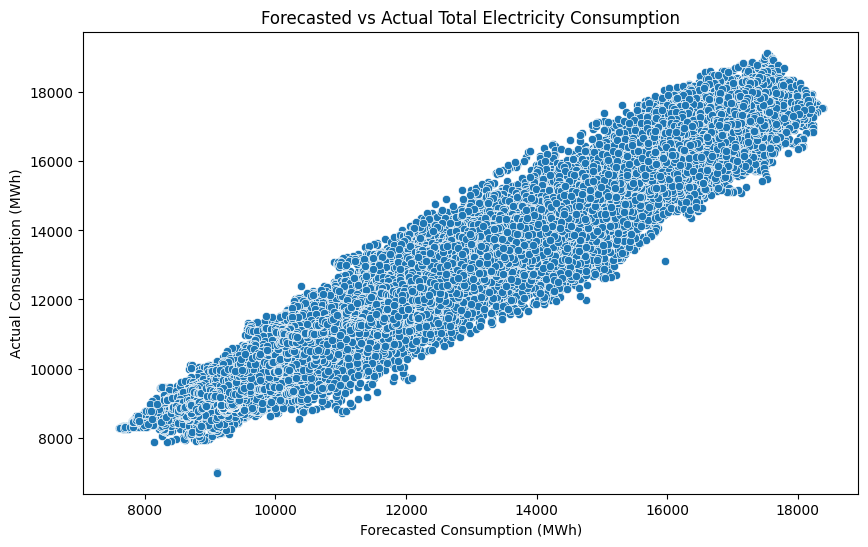

In [116]:
# Scatter Plot for Total Consumption

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Forecasted_consumption_Total (grid load) [MWh]'], y=data['Actual_consumption_Total (grid load) [MWh]'])
plt.title('Forecasted vs Actual Total Electricity Consumption')
plt.xlabel('Forecasted Consumption (MWh)')
plt.ylabel('Actual Consumption (MWh)')
plt.show()


In [118]:
gen_corr = data[['Forecasted_generation_Total [MWh]', 'Actual_generation_Total [MWh]']].corr().iloc[0, 1]
print(f"Correlation between forecasted and actual generation: {gen_corr:.4f}")


Correlation between forecasted and actual generation: 0.9798


In [120]:
cons_corr = data[['Forecasted_consumption_Total (grid load) [MWh]', 'Actual_consumption_Total (grid load) [MWh]']].corr().iloc[0, 1]
print(f"Correlation between forecasted and actual consumption: {cons_corr:.4f}")


Correlation between forecasted and actual consumption: 0.9837


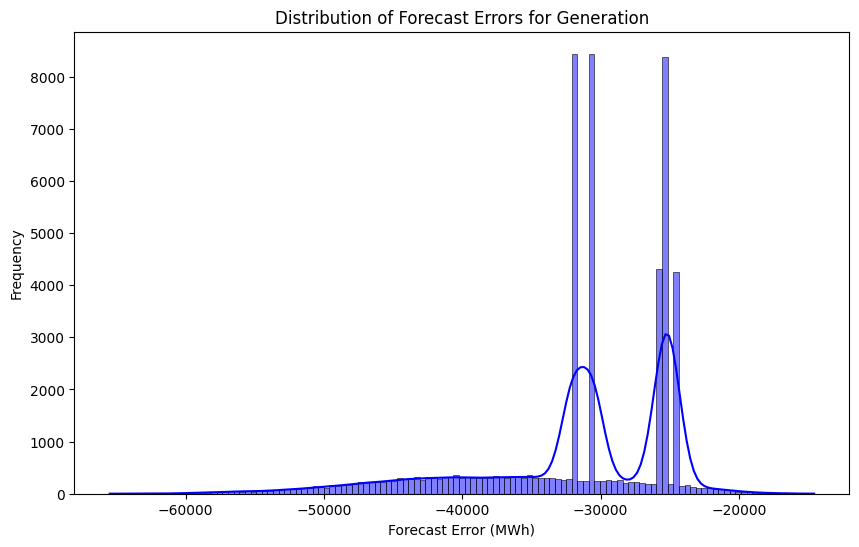

In [122]:
# Generation Forecast Error Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Gen_diff'], kde=True, color='blue')
plt.title('Distribution of Forecast Errors for Generation')
plt.xlabel('Forecast Error (MWh)')
plt.ylabel('Frequency')
plt.show()


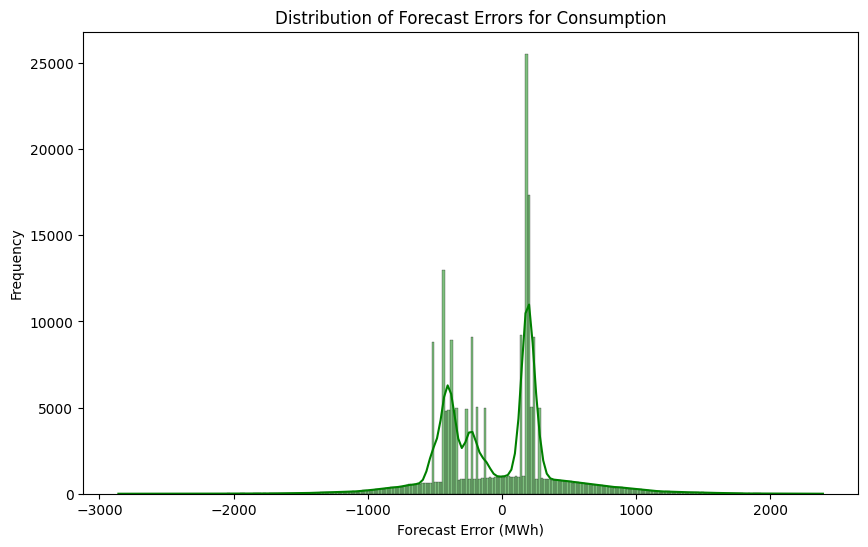

In [124]:
# Consumption Forecast Error Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Cons_diff'], kde=True, color='green')
plt.title('Distribution of Forecast Errors for Consumption')
plt.xlabel('Forecast Error (MWh)')
plt.ylabel('Frequency')
plt.show()


In [126]:
# How do balancing reserves and TSO costs impact electricity prices?

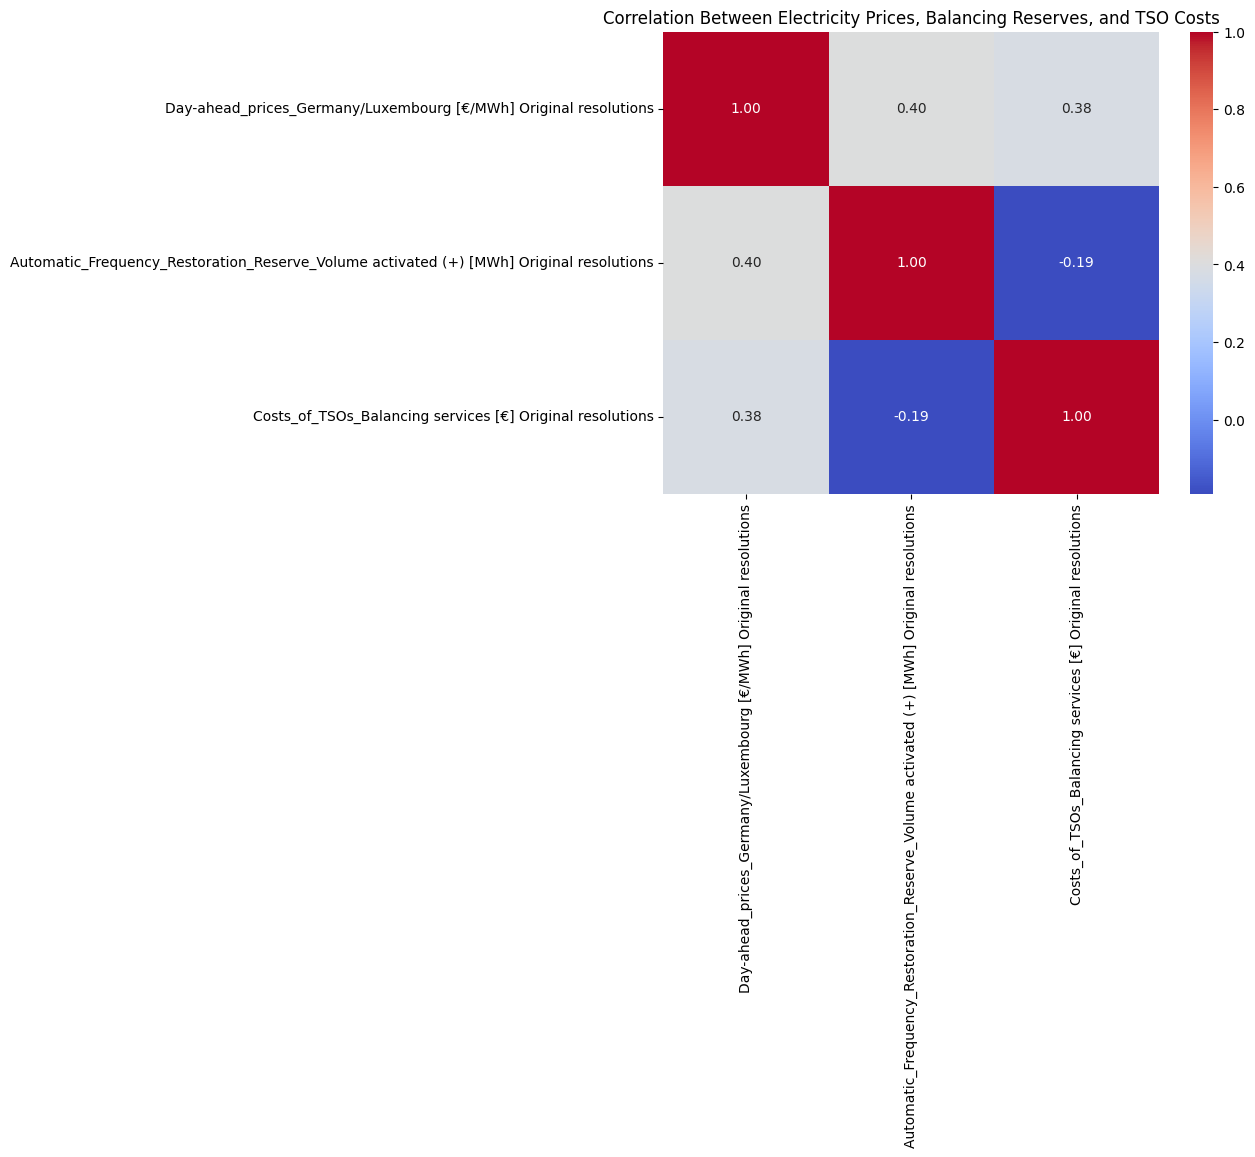

In [130]:
# Select relevant columns
correlation_data = data[['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions',
                          'Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions',
                          'Costs_of_TSOs_Balancing services [€] Original resolutions']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Electricity Prices, Balancing Reserves, and TSO Costs')
plt.show()


In [132]:
correlation_matrix

Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions  \
Day-ahead_prices_Germany/Luxembourg [€/MWh] Ori...                                           1.000000                  
Automatic_Frequency_Restoration_Reserve_Volume ...                                           0.403194                  
Costs_of_TSOs_Balancing services [€] Original r...                                           0.380476                  

                                                    Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions  \
Day-ahead_prices_Germany/Luxembourg [€/MWh] Ori...                                           0.403194                                         
Automatic_Frequency_Restoration_Reserve_Volume ...                                           1.000000                                         
Costs_of_TSOs_Balancing services [€] Original r...                                          -0.190753                                         

                                                    Costs_of_TSOs_Balancing services [€] Original resolutions  
Day-ahead_prices_Germany/Luxembourg [€/MWh] Ori...                                           0.380476          
Automatic_Frequency_Restoration_Reserve_Volume ...                                          -0.190753          
Costs_of_TSOs_Balancing services [€] Original r...                                           1.000000

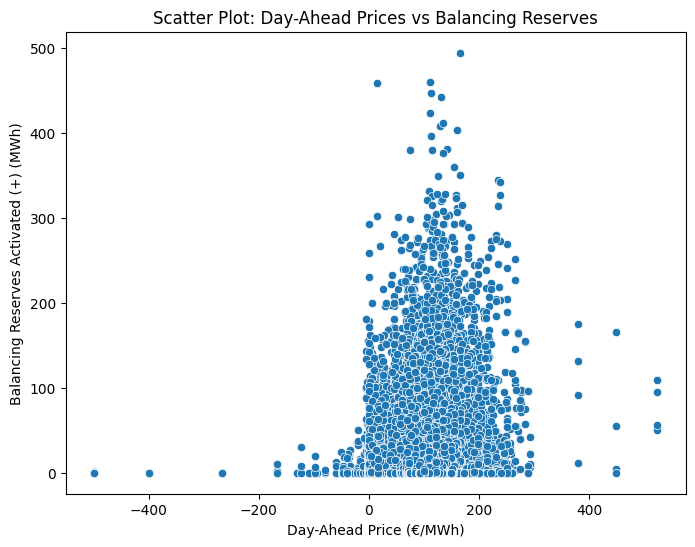

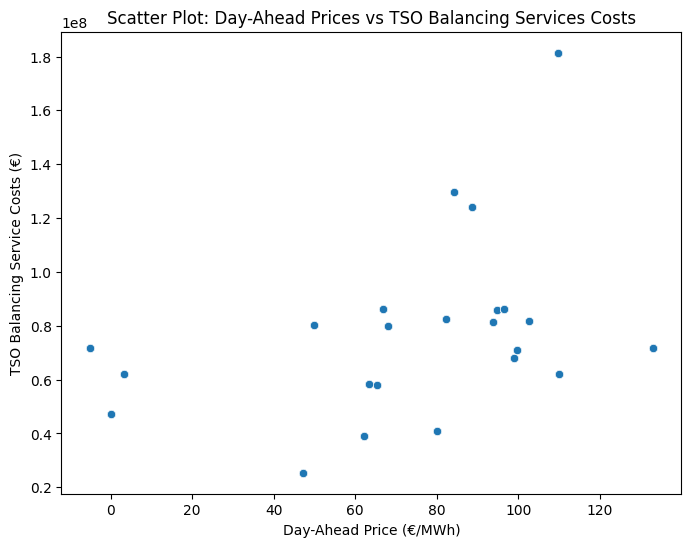

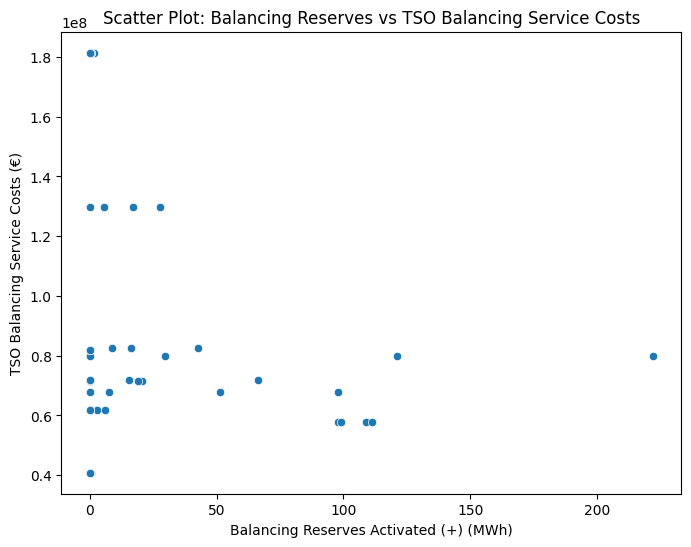

In [134]:
# Scatter plot between Day-Ahead Prices and Balancing Reserves
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'],
                y=data['Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions'])
plt.title('Scatter Plot: Day-Ahead Prices vs Balancing Reserves')
plt.xlabel('Day-Ahead Price (€/MWh)')
plt.ylabel('Balancing Reserves Activated (+) (MWh)')
plt.show()

# Scatter plot between Day-Ahead Prices and TSO Balancing Service Costs
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'],
                y=data['Costs_of_TSOs_Balancing services [€] Original resolutions'])
plt.title('Scatter Plot: Day-Ahead Prices vs TSO Balancing Services Costs')
plt.xlabel('Day-Ahead Price (€/MWh)')
plt.ylabel('TSO Balancing Service Costs (€)')
plt.show()

# Scatter plot between Balancing Reserves and TSO Balancing Service Costs
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions'],
                y=data['Costs_of_TSOs_Balancing services [€] Original resolutions'])
plt.title('Scatter Plot: Balancing Reserves vs TSO Balancing Service Costs')
plt.xlabel('Balancing Reserves Activated (+) (MWh)')
plt.ylabel('TSO Balancing Service Costs (€)')
plt.show()


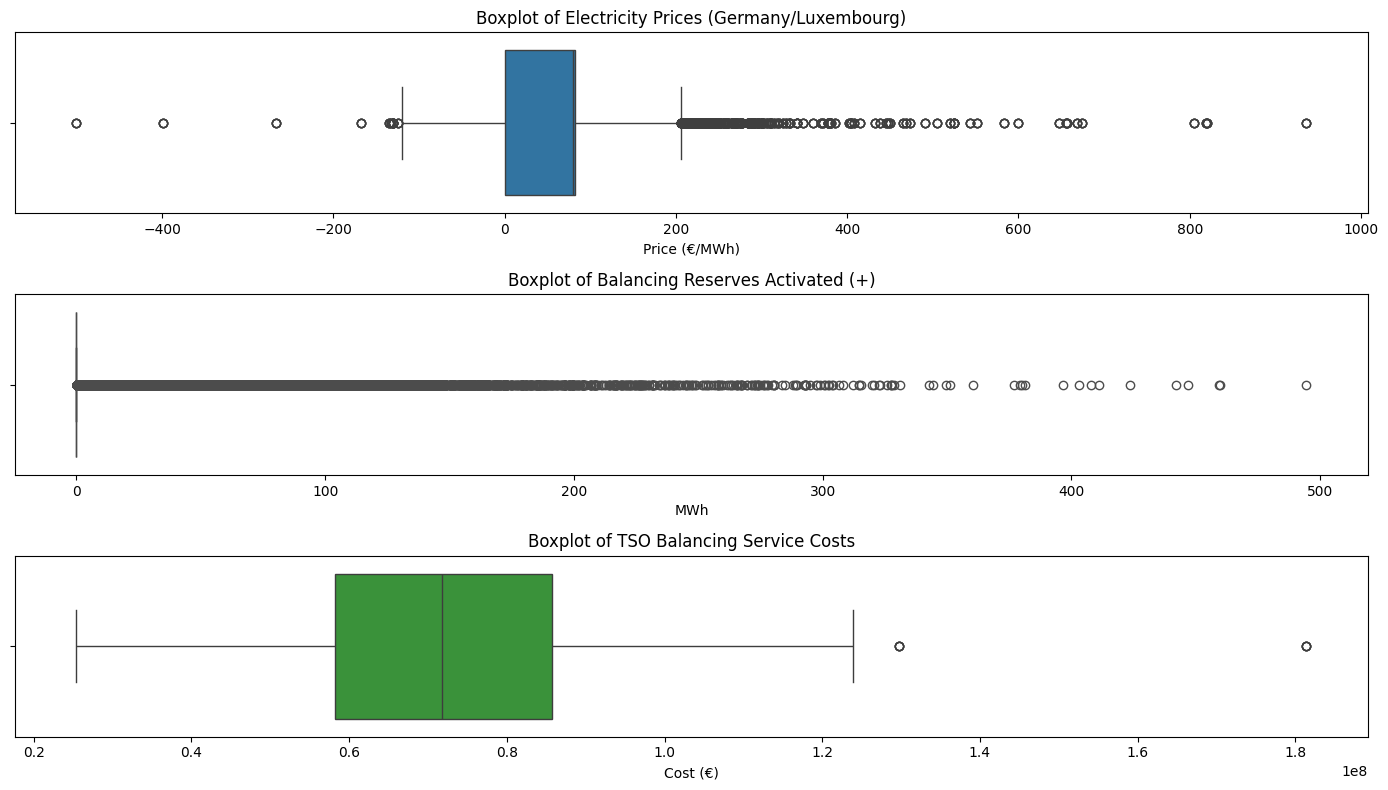

In [136]:
# Boxplot of TSO Costs, Balancing Reserves, and Electricity Prices
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
sns.boxplot(x=data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'], color='tab:blue')
plt.title('Boxplot of Electricity Prices (Germany/Luxembourg)')
plt.xlabel('Price (€/MWh)')

plt.subplot(3, 1, 2)
sns.boxplot(x=data['Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions'], color='tab:red')
plt.title('Boxplot of Balancing Reserves Activated (+)')
plt.xlabel('MWh')

plt.subplot(3, 1, 3)
sns.boxplot(x=data['Costs_of_TSOs_Balancing services [€] Original resolutions'], color='tab:green')
plt.title('Boxplot of TSO Balancing Service Costs')
plt.xlabel('Cost (€)')

plt.tight_layout()
plt.show()


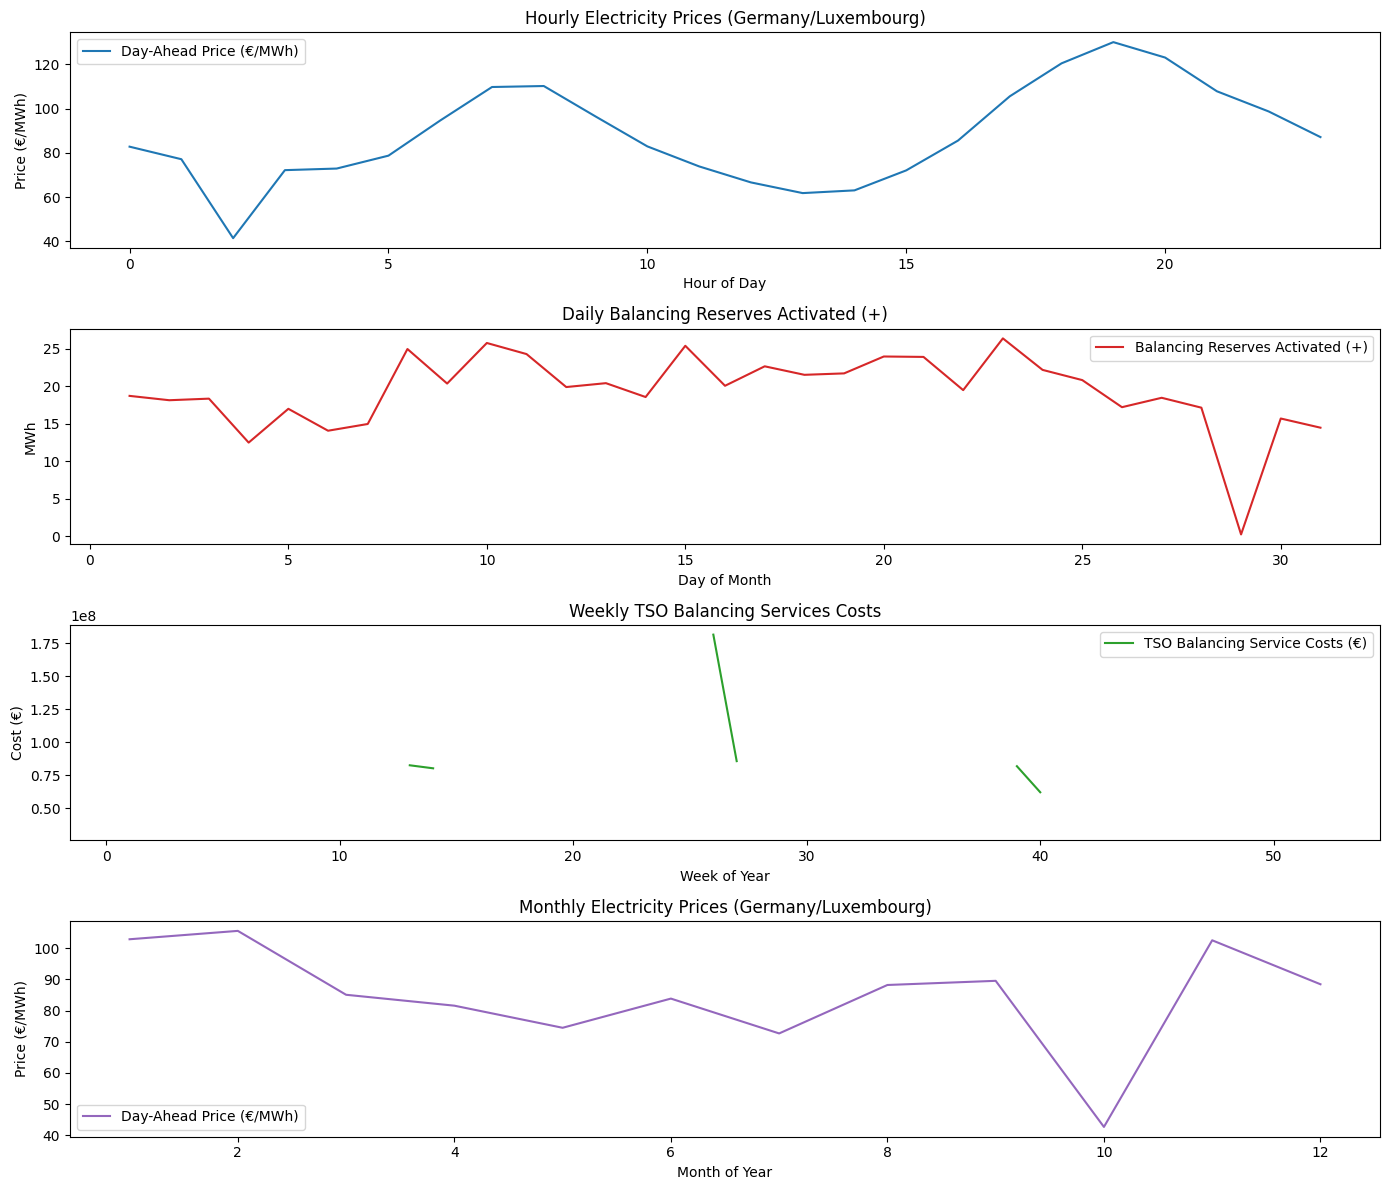

In [142]:
# Group by hour, day, week, and month, and compute the mean for relevant columns
hourly_data = data.groupby('hour')[['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions',
                                    'Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions',
                                    'Costs_of_TSOs_Balancing services [€] Original resolutions']].mean()

daily_data = data.groupby('day')[['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions',
                                  'Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions',
                                  'Costs_of_TSOs_Balancing services [€] Original resolutions']].mean()

weekly_data = data.groupby('week')[['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions',
                                    'Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions',
                                    'Costs_of_TSOs_Balancing services [€] Original resolutions']].mean()

monthly_data = data.groupby('month')[['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions',
                                      'Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions',
                                      'Costs_of_TSOs_Balancing services [€] Original resolutions']].mean()

# Plot for Germany Day-Ahead Prices, Balancing Reserves, and TSO Costs
plt.figure(figsize=(14, 12))

# Hourly Plot
plt.subplot(4, 1, 1)
plt.plot(hourly_data.index, hourly_data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'], label='Day-Ahead Price (€/MWh)', color='tab:blue')
plt.title('Hourly Electricity Prices (Germany/Luxembourg)')
plt.xlabel('Hour of Day')
plt.ylabel('Price (€/MWh)')
plt.legend()

# Daily Plot
plt.subplot(4, 1, 2)
plt.plot(daily_data.index, daily_data['Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh] Original resolutions'], label='Balancing Reserves Activated (+)', color='tab:red')
plt.title('Daily Balancing Reserves Activated (+)')
plt.xlabel('Day of Month')
plt.ylabel('MWh')
plt.legend()

# Weekly Plot
plt.subplot(4, 1, 3)
plt.plot(weekly_data.index, weekly_data['Costs_of_TSOs_Balancing services [€] Original resolutions'], label='TSO Balancing Service Costs (€)', color='tab:green')
plt.title('Weekly TSO Balancing Services Costs')
plt.xlabel('Week of Year')
plt.ylabel('Cost (€)')
plt.legend()

# Monthly Plot
plt.subplot(4, 1, 4)
plt.plot(monthly_data.index, monthly_data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'], label='Day-Ahead Price (€/MWh)', color='tab:purple')
plt.title('Monthly Electricity Prices (Germany/Luxembourg)')
plt.xlabel('Month of Year')
plt.ylabel('Price (€/MWh)')
plt.legend()

plt.tight_layout()
plt.show()


In [144]:
# Price & Consumption Impact Analysis

In [146]:
# How do scheduled commercial exchanges influence price fluctuations?

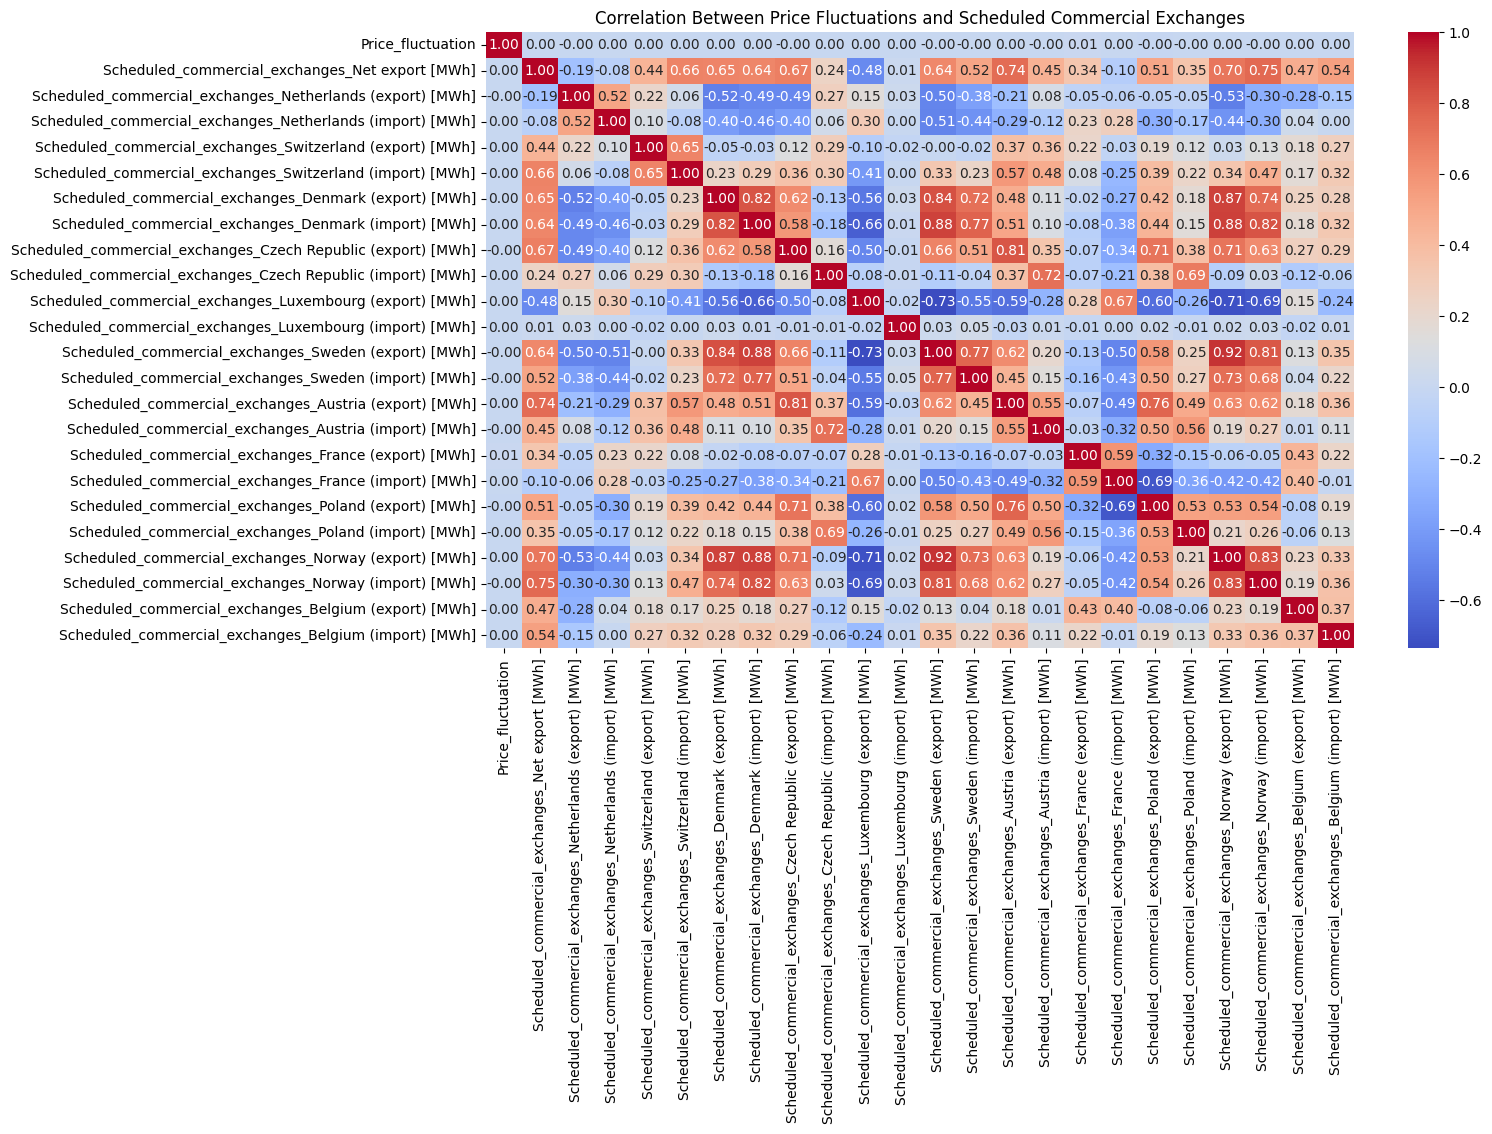

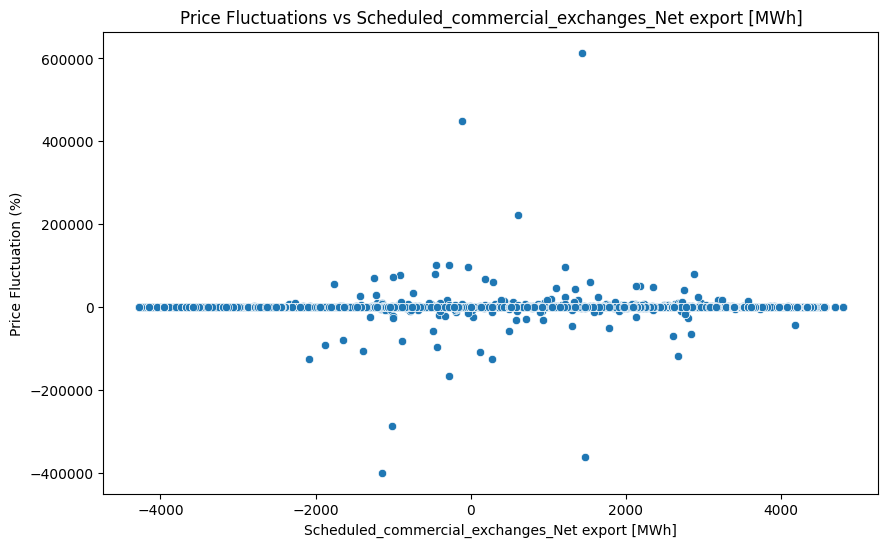

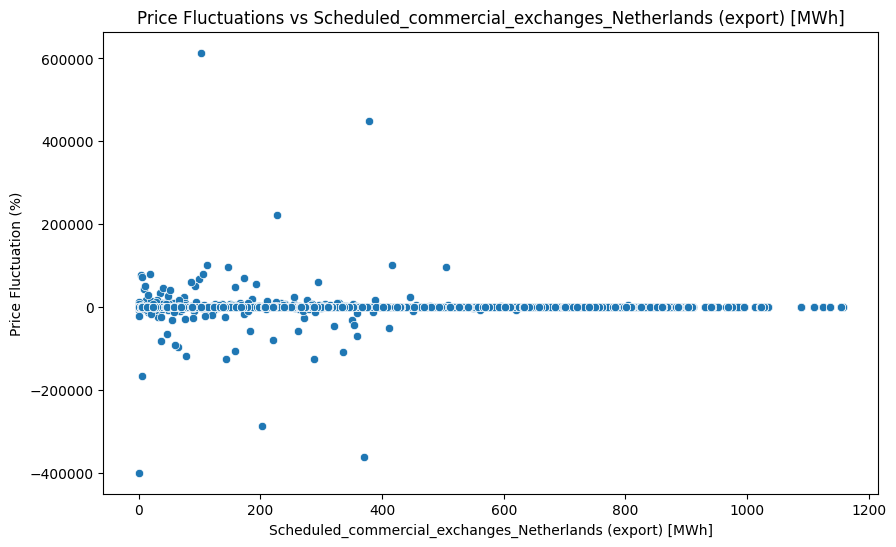

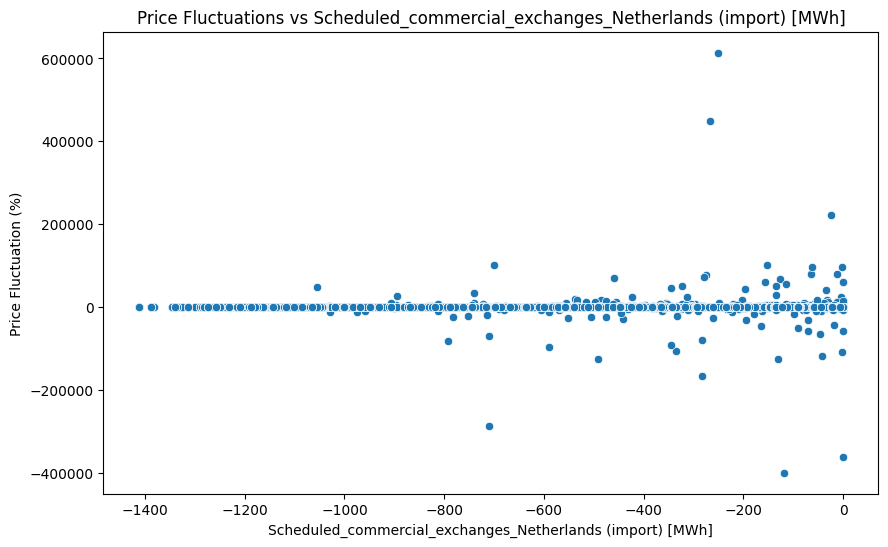

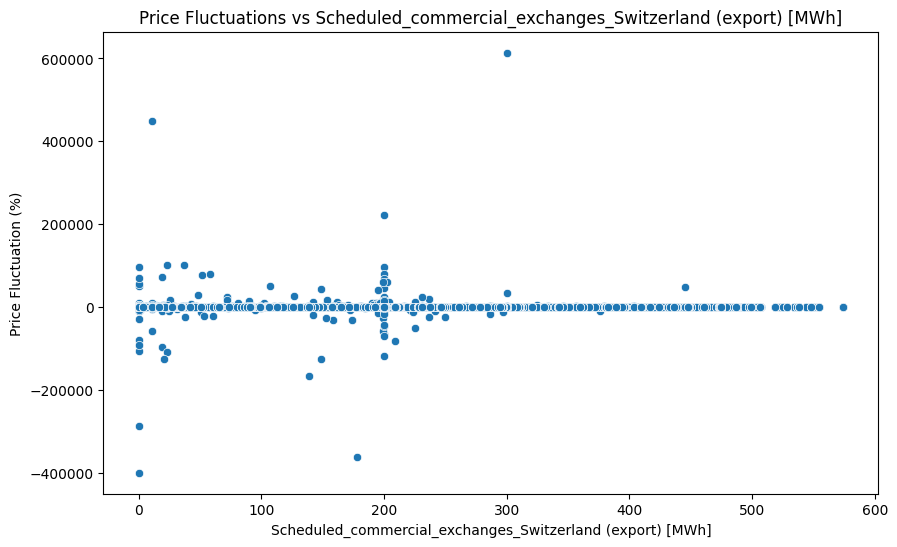

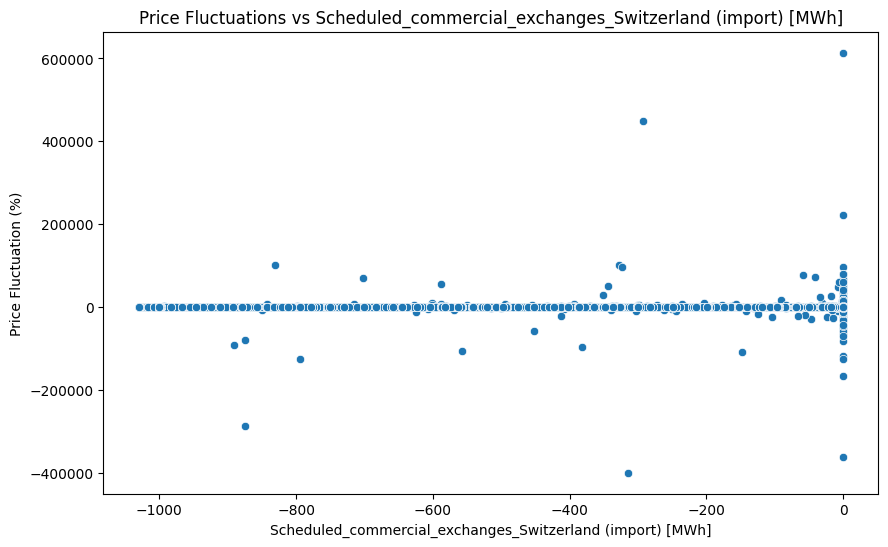

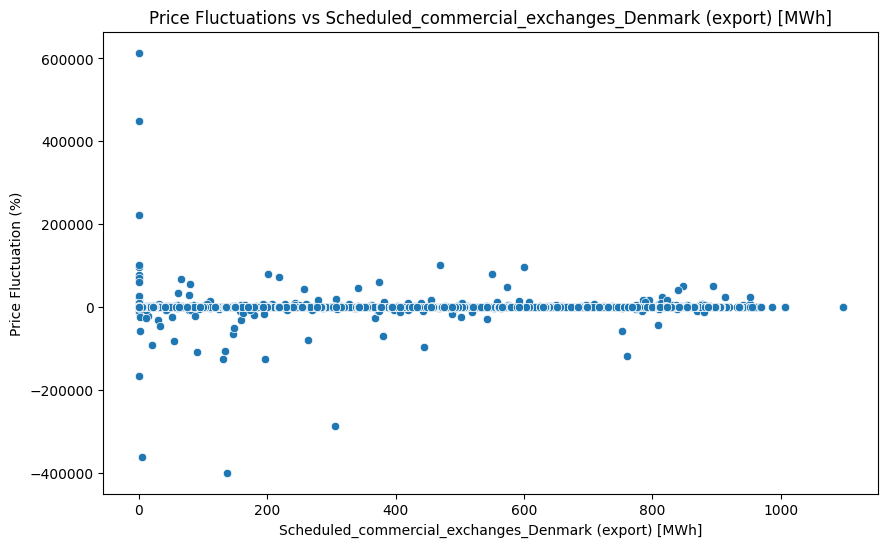

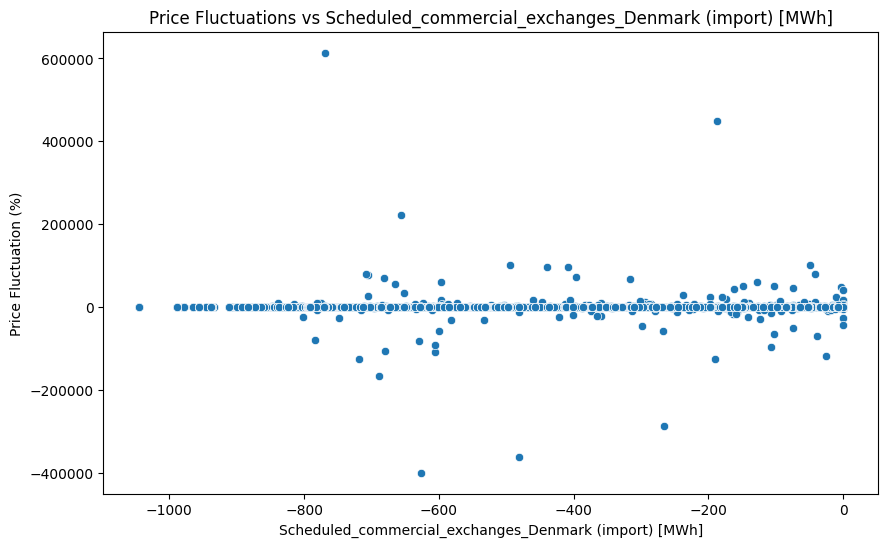

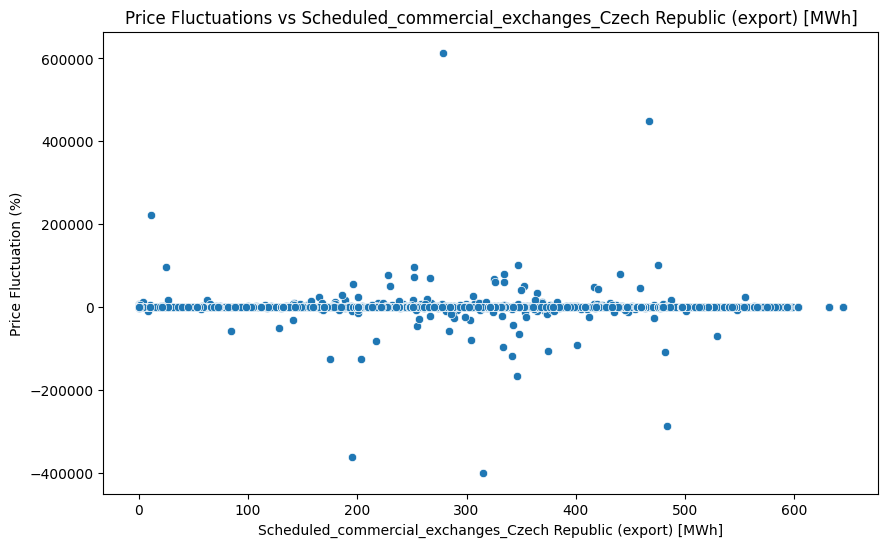

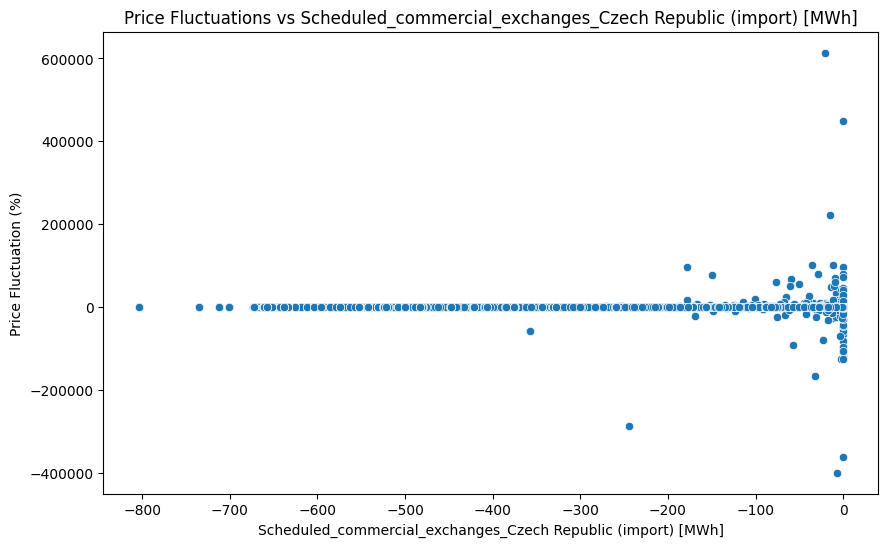

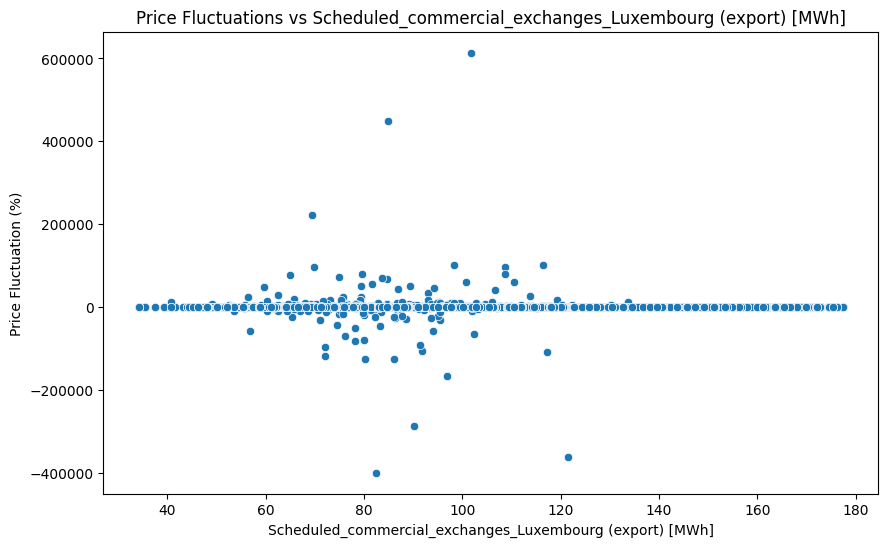

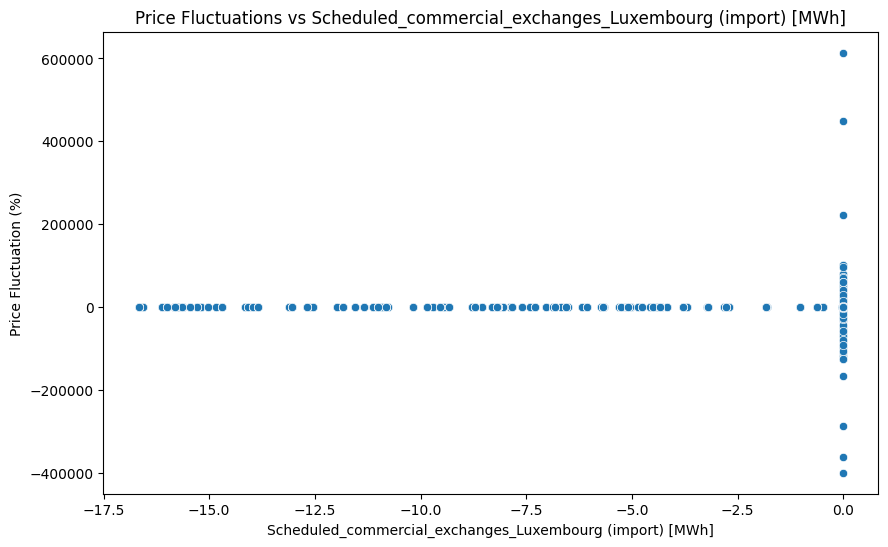

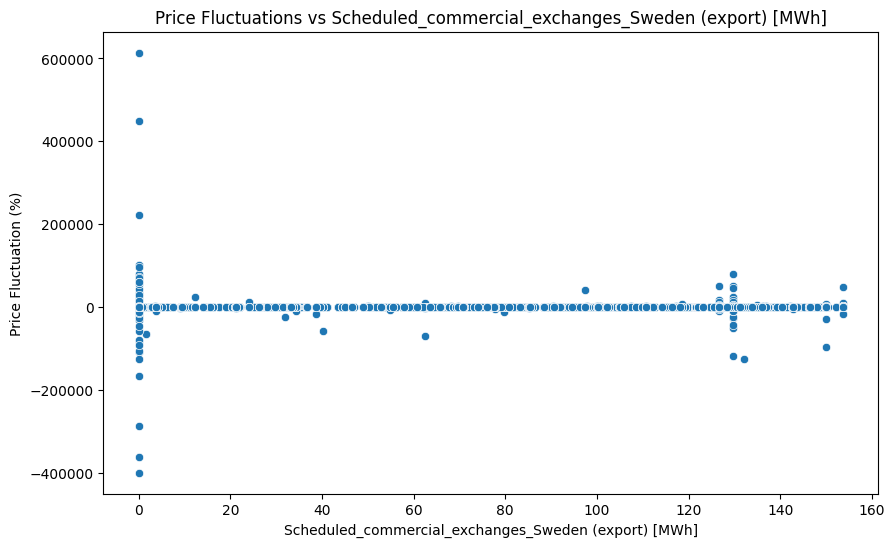

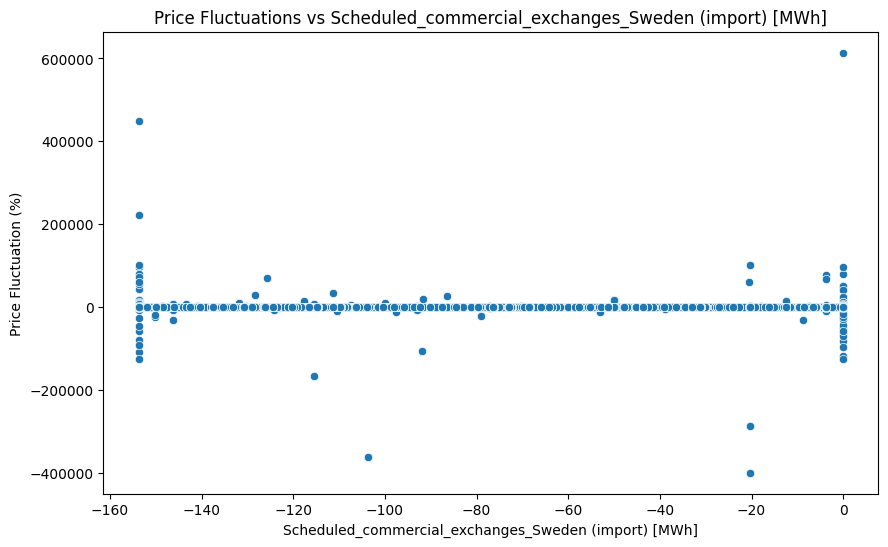

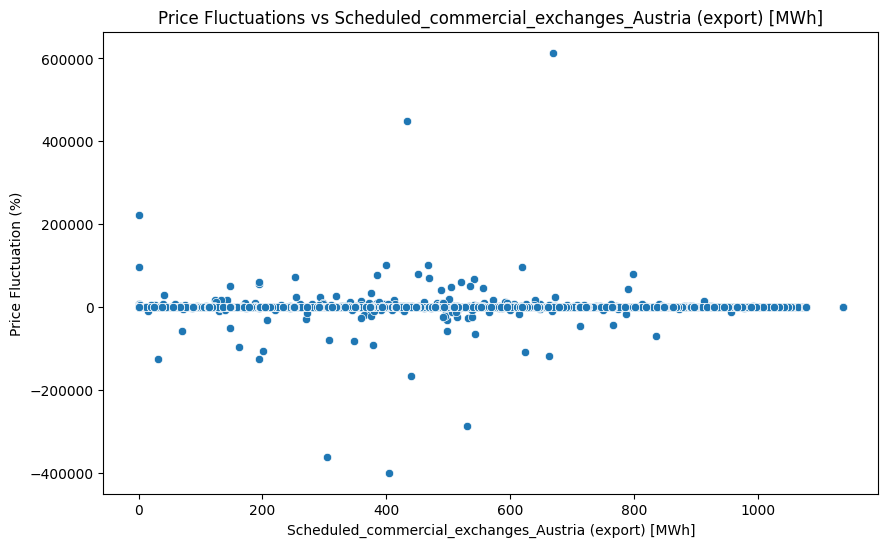

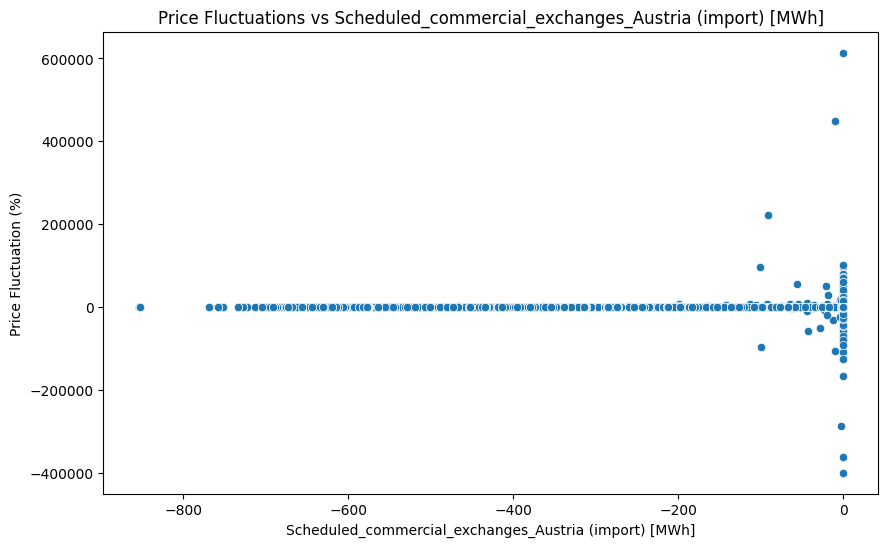

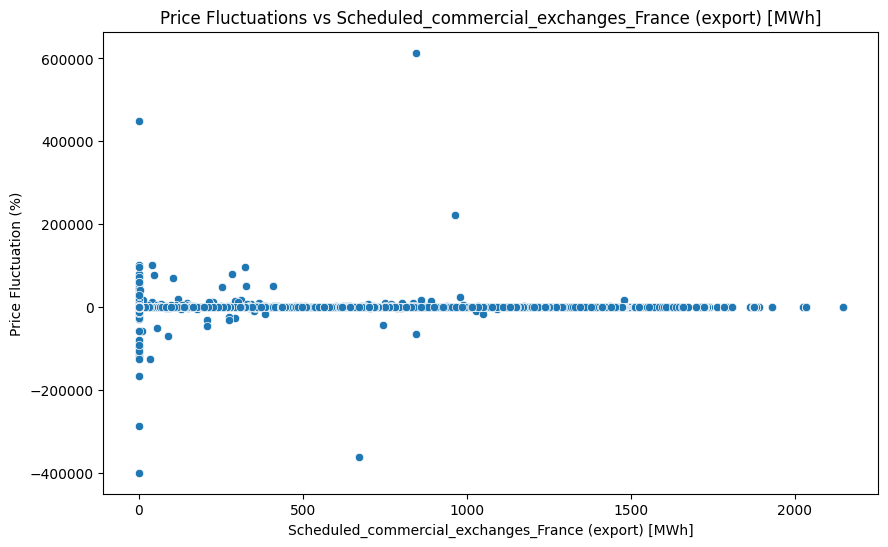

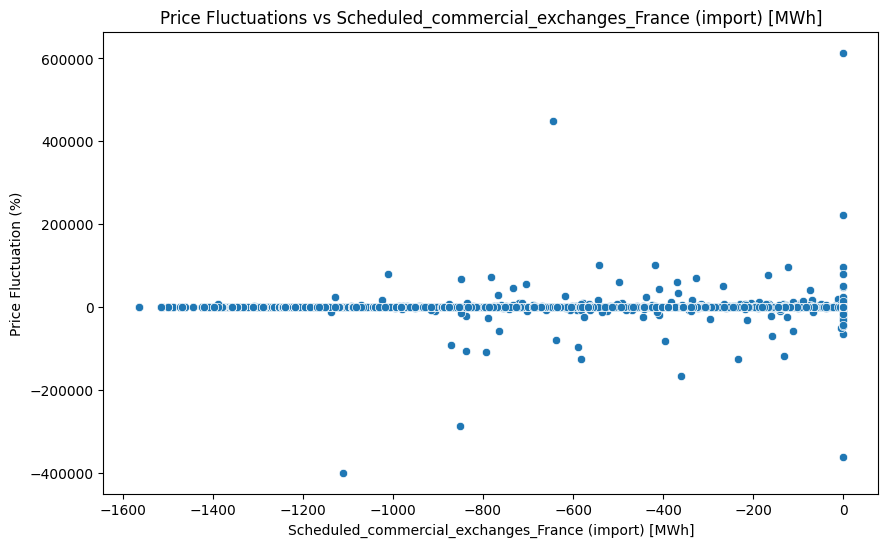

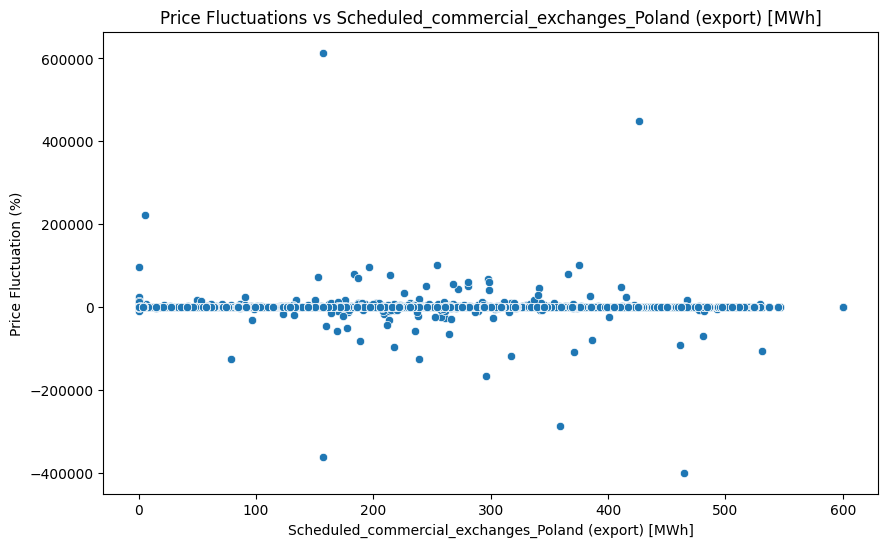

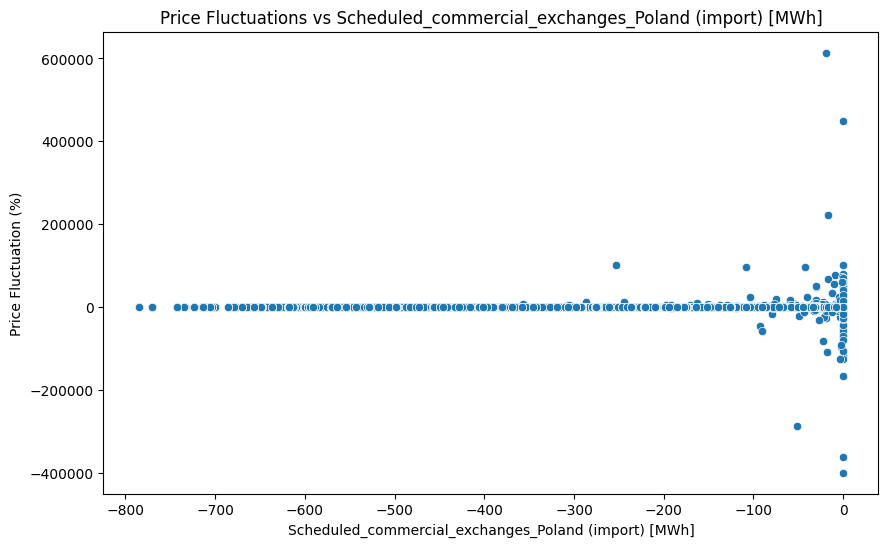

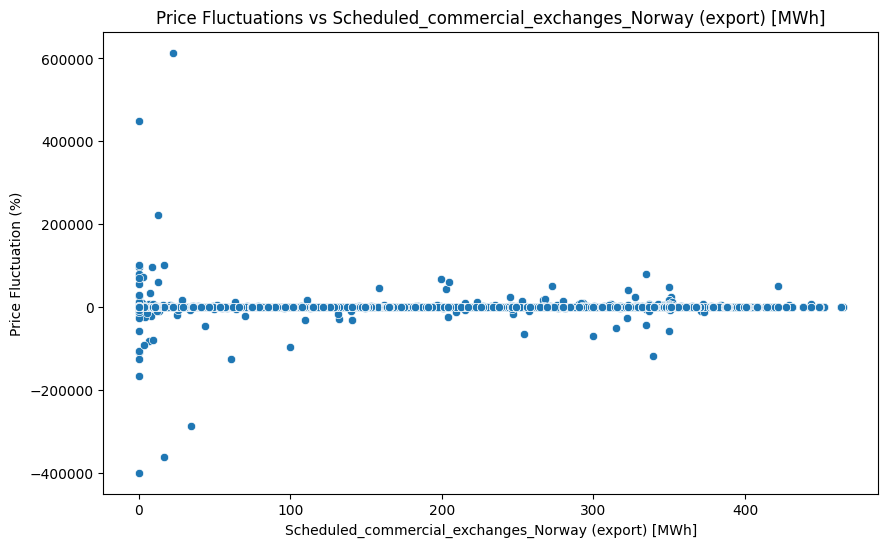

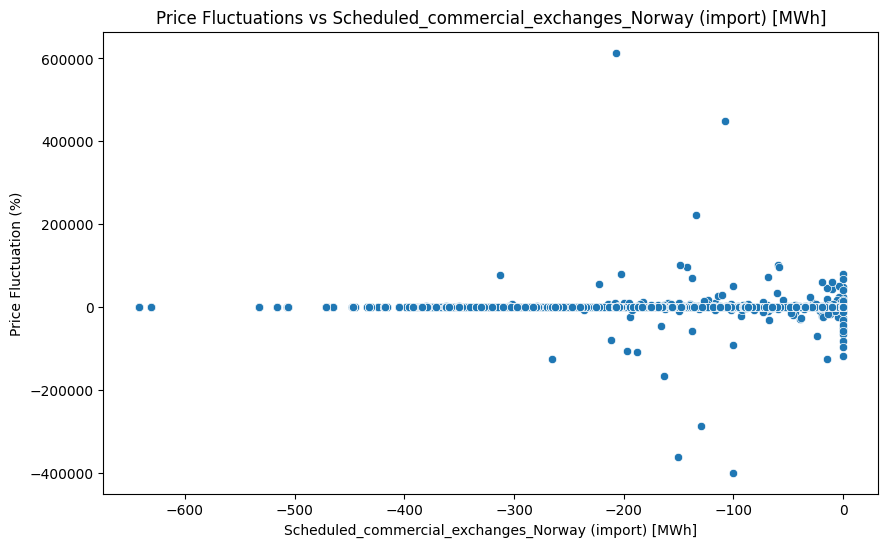

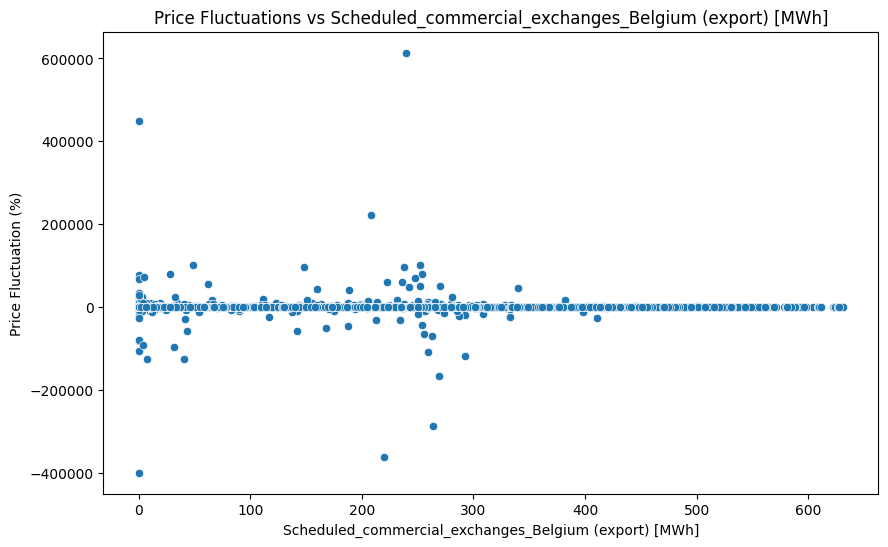

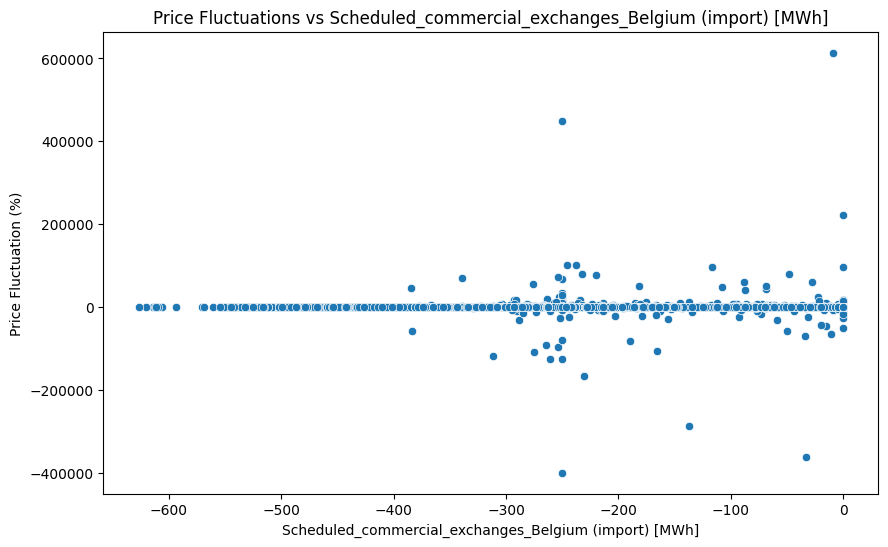

In [150]:
# Assuming the columns for scheduled exchanges are in the list `scheduled_columns`

# List of all scheduled commercial exchange columns
scheduled_columns = [
    'Scheduled_commercial_exchanges_Net export [MWh]',
    'Scheduled_commercial_exchanges_Netherlands (export) [MWh]',
    'Scheduled_commercial_exchanges_Netherlands (import) [MWh]',
    'Scheduled_commercial_exchanges_Switzerland (export) [MWh]',
    'Scheduled_commercial_exchanges_Switzerland (import) [MWh]',
    'Scheduled_commercial_exchanges_Denmark (export) [MWh]',
    'Scheduled_commercial_exchanges_Denmark (import) [MWh]',
    'Scheduled_commercial_exchanges_Czech Republic (export) [MWh]',
    'Scheduled_commercial_exchanges_Czech Republic (import) [MWh]',
    'Scheduled_commercial_exchanges_Luxembourg (export) [MWh]',
    'Scheduled_commercial_exchanges_Luxembourg (import) [MWh]',
    'Scheduled_commercial_exchanges_Sweden (export) [MWh]',
    'Scheduled_commercial_exchanges_Sweden (import) [MWh]',
    'Scheduled_commercial_exchanges_Austria (export) [MWh]',
    'Scheduled_commercial_exchanges_Austria (import) [MWh]',
    'Scheduled_commercial_exchanges_France (export) [MWh]',
    'Scheduled_commercial_exchanges_France (import) [MWh]',
    'Scheduled_commercial_exchanges_Poland (export) [MWh]',
    'Scheduled_commercial_exchanges_Poland (import) [MWh]',
    'Scheduled_commercial_exchanges_Norway (export) [MWh]',
    'Scheduled_commercial_exchanges_Norway (import) [MWh]',
    'Scheduled_commercial_exchanges_Belgium (export) [MWh]',
    'Scheduled_commercial_exchanges_Belgium (import) [MWh]'
]

# Calculate daily price fluctuations (percentage change)
data['Price_fluctuation'] = data['Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'].pct_change() * 100

# Correlation matrix between price fluctuations and scheduled commercial exchanges
correlation_matrix = data[['Price_fluctuation'] + scheduled_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Price Fluctuations and Scheduled Commercial Exchanges')
plt.show()

# Scatter plots for each scheduled exchange against price fluctuations
for column in scheduled_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=column, y='Price_fluctuation', color='tab:blue')
    plt.title(f'Price Fluctuations vs {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Price Fluctuation (%)')
    plt.show()


In [152]:
correlation_matrix

Price_fluctuation  \
Price_fluctuation                                            1.000000   
Scheduled_commercial_exchanges_Net export [MWh]              0.003039   
Scheduled_commercial_exchanges_Netherlands (exp...          -0.000075   
Scheduled_commercial_exchanges_Netherlands (imp...           0.001441   
Scheduled_commercial_exchanges_Switzerland (exp...           0.003437   
Scheduled_commercial_exchanges_Switzerland (imp...           0.003560   
Scheduled_commercial_exchanges_Denmark (export)...           0.000070   
Scheduled_commercial_exchanges_Denmark (import)...           0.000078   
Scheduled_commercial_exchanges_Czech Republic (...          -0.000556   
Scheduled_commercial_exchanges_Czech Republic (...           0.001046   
Scheduled_commercial_exchanges_Luxembourg (expo...           0.000078   
Scheduled_commercial_exchanges_Luxembourg (impo...           0.000002   
Scheduled_commercial_exchanges_Sweden (export) ...          -0.000667   
Scheduled_commercial_exchanges_Sweden (import) ...          -0.001283   
Scheduled_commercial_exchanges_Austria (export)...           0.000895   
Scheduled_commercial_exchanges_Austria (import)...          -0.000587   
Scheduled_commercial_exchanges_France (export) ...           0.005214   
Scheduled_commercial_exchanges_France (import) ...           0.003909   
Scheduled_commercial_exchanges_Poland (export) ...          -0.003439   
Scheduled_commercial_exchanges_Poland (import) ...          -0.001055   
Scheduled_commercial_exchanges_Norway (export) ...           0.000546   
Scheduled_commercial_exchanges_Norway (import) ...          -0.000608   
Scheduled_commercial_exchanges_Belgium (export)...           0.000731   
Scheduled_commercial_exchanges_Belgium (import)...           0.002165   

                                                    Scheduled_commercial_exchanges_Net export [MWh]  \
Price_fluctuation                                                                          0.003039   
Scheduled_commercial_exchanges_Net export [MWh]                                            1.000000   
Scheduled_commercial_exchanges_Netherlands (exp...                                        -0.193875   
Scheduled_commercial_exchanges_Netherlands (imp...                                        -0.075096   
Scheduled_commercial_exchanges_Switzerland (exp...                                         0.442028   
Scheduled_commercial_exchanges_Switzerland (imp...                                         0.656937   
Scheduled_commercial_exchanges_Denmark (export)...                                         0.654263   
Scheduled_commercial_exchanges_Denmark (import)...                                         0.643412   
Scheduled_commercial_exchanges_Czech Republic (...                                         0.670377   
Scheduled_commercial_exchanges_Czech Republic (...                                         0.243263   
Scheduled_commercial_exchanges_Luxembourg (expo...                                        -0.477594   
Scheduled_commercial_exchanges_Luxembourg (impo...                                         0.014705   
Scheduled_commercial_exchanges_Sweden (export) ...                                         0.635973   
Scheduled_commercial_exchanges_Sweden (import) ...                                         0.518062   
Scheduled_commercial_exchanges_Austria (export)...                                         0.740061   
Scheduled_commercial_exchanges_Austria (import)...                                         0.453966   
Scheduled_commercial_exchanges_France (export) ...                                         0.340610   
Scheduled_commercial_exchanges_France (import) ...                                        -0.102246   
Scheduled_commercial_exchanges_Poland (export) ...                                         0.510749   
Scheduled_commercial_exchanges_Poland (import) ...                                         0.354401   
Scheduled_commercial_exchanges_Norway (export) ...             

In [154]:
"""
Price Fluctuation & Commercial Exchanges:

There’s no significant direct correlation between Price Fluctuation and the commercial exchanges from most countries. Most correlation values are very low (close to zero). For example, Price Fluctuation has near-zero correlation with Scheduled_commercial_exchanges_Netherlands (export), Scheduled_commercial_exchanges_Denmark (import), and Scheduled_commercial_exchanges_Czech Republic (import).
Scheduled commercial exchanges from Switzerland (both import and export) show a small positive correlation (~0.0034 to 0.0035), indicating a very mild, positive relationship with price fluctuations, although the correlation is still weak.
Country-wise Export/Import Relations:

Scheduled commercial exchanges between countries show a stronger correlation. For instance:
Denmark (both import and export) has high positive correlations (0.643 to 0.654 with various countries).
Poland (export) and Poland (import) show high correlations with countries like France and Austria.
Sweden and Norway show high correlations (both exports and imports), implying interdependence between their scheduled exchanges and the data on imports/exports.
Correlations Between Imports and Exports:

Most export columns (from countries like Netherlands, France, Poland, Norway, etc.) show a weak to moderate correlation with their respective import columns (e.g., Netherlands export vs. Netherlands import at ~0.515).
There are variations based on the country, indicating that the export/import dynamics aren’t entirely synchronized.
Stronger Correlations Between Certain Countries:

Some countries have strong positive correlations with each other’s scheduled commercial exchanges. For example:
Switzerland (import/export) correlates strongly with Denmark, Czech Republic, and Norway, showing that these countries’ exchanges are more likely to move in the same direction.
Poland has moderate correlations with France and Austria, indicating some level of interconnectedness.
Less Interdependence with Price Fluctuations:

Price fluctuations are mostly not highly correlated with specific commercial exchanges (exports/imports). This suggests that price fluctuation is likely influenced by broader market factors that aren't captured by just the scheduled exports/imports of electricity.
Key Takeaways:
Scheduled exchanges (exports/imports) tend to have stronger internal correlations, especially for countries with more interconnected energy markets (e.g., Norway, Denmark, and Sweden).
Price fluctuations do not seem to have a strong direct relationship with any of the scheduled exchanges but may still be impacted by other factors like market trends, generation, or balancing reserves.
The data reveals complex interrelations between scheduled exchanges, which may be important for energy market modeling or forecasting.
"""

"\nPrice Fluctuation & Commercial Exchanges:\n\nThere’s no significant direct correlation between Price Fluctuation and the commercial exchanges from most countries. Most correlation values are very low (close to zero). For example, Price Fluctuation has near-zero correlation with Scheduled_commercial_exchanges_Netherlands (export), Scheduled_commercial_exchanges_Denmark (import), and Scheduled_commercial_exchanges_Czech Republic (import).\nScheduled commercial exchanges from Switzerland (both import and export) show a small positive correlation (~0.0034 to 0.0035), indicating a very mild, positive relationship with price fluctuations, although the correlation is still weak.\nCountry-wise Export/Import Relations:\n\nScheduled commercial exchanges between countries show a stronger correlation. For instance:\nDenmark (both import and export) has high positive correlations (0.643 to 0.654 with various countries).\nPoland (export) and Poland (import) show high correlations with countries l

In [156]:
# What is the impact of cross-border physical flows on electricity prices?

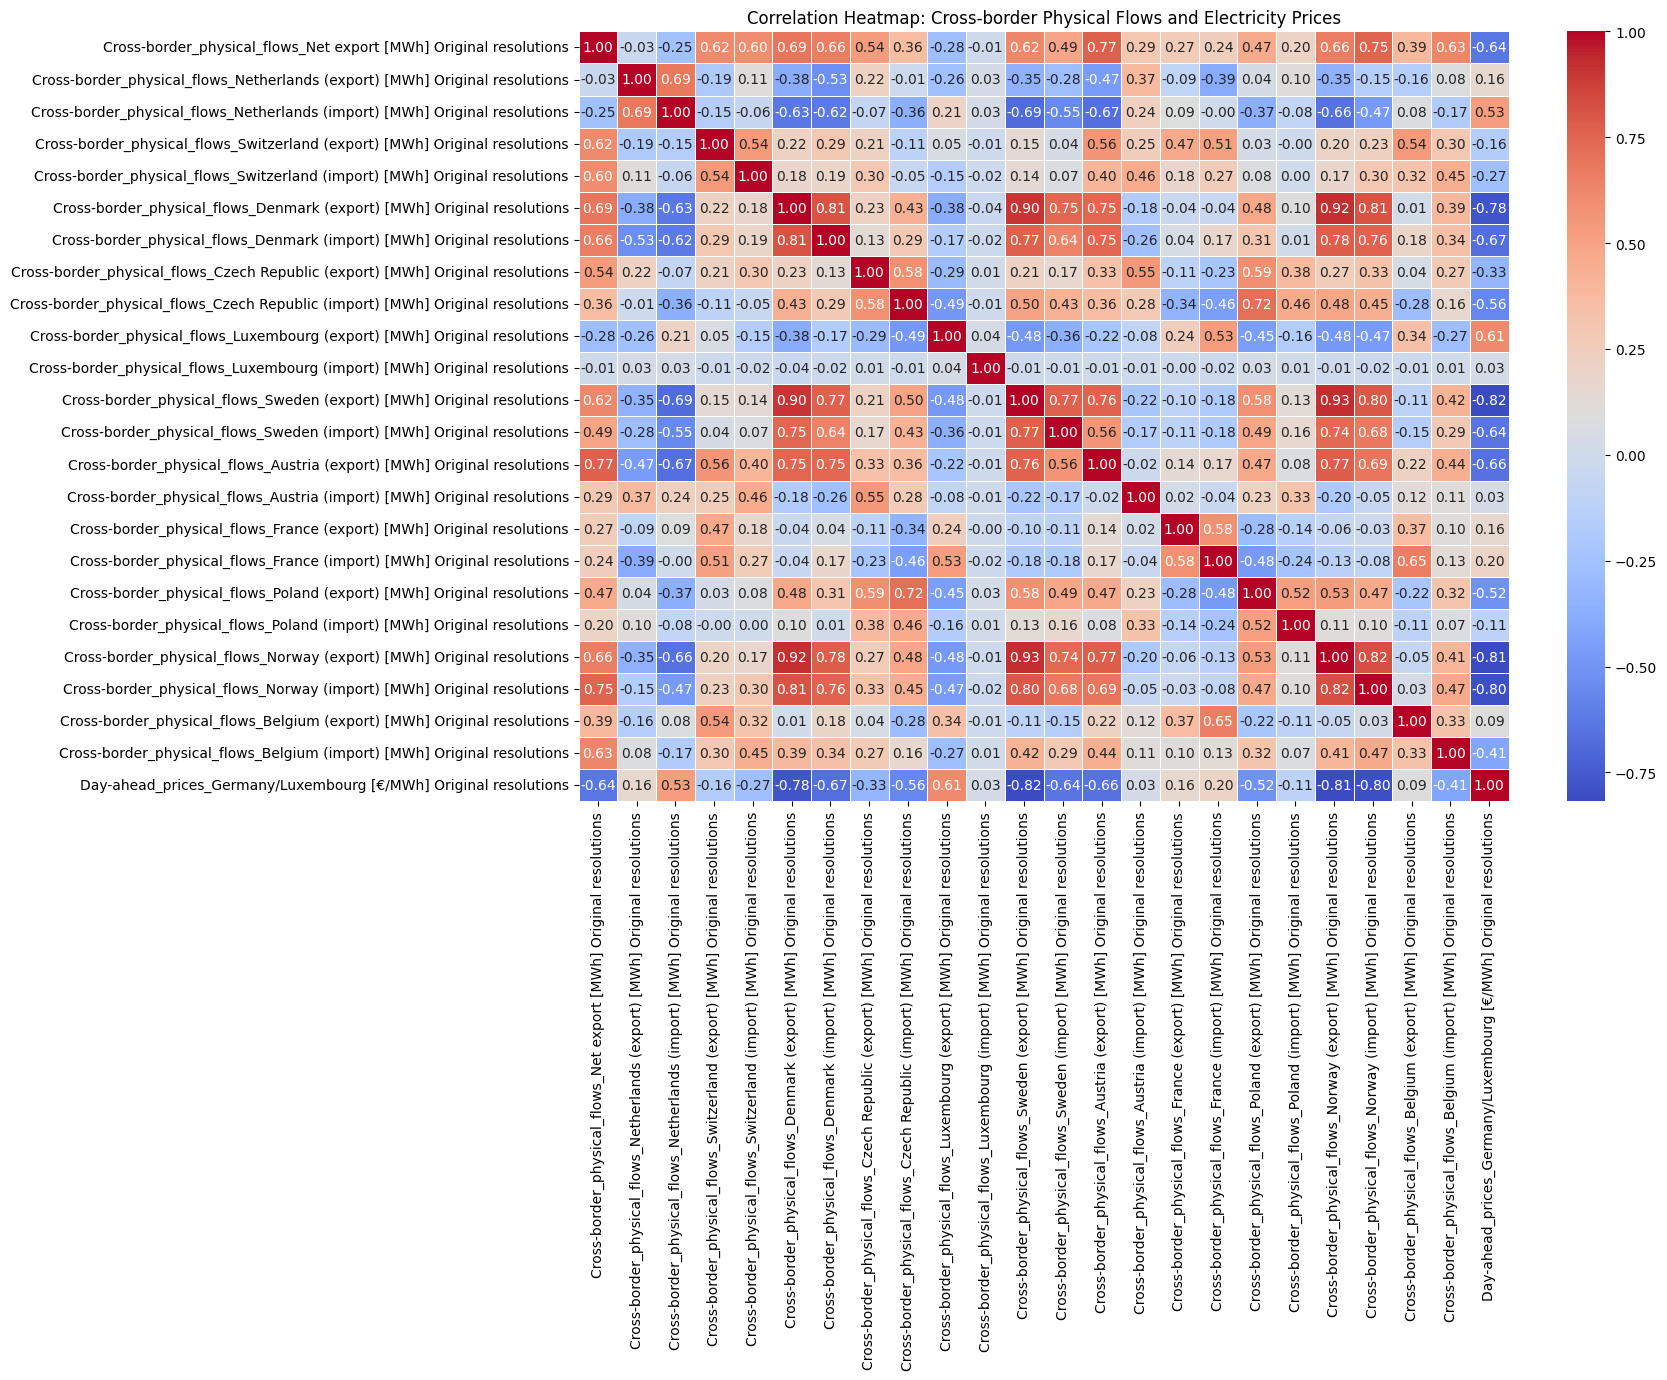

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of relevant columns (cross-border flows and the target variable)
cross_border_columns = [
    'Cross-border_physical_flows_Net export [MWh] Original resolutions',
    'Cross-border_physical_flows_Netherlands (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Netherlands (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_Switzerland (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Switzerland (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_Denmark (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Denmark (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_Czech Republic (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Czech Republic (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_Luxembourg (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Luxembourg (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_Sweden (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Sweden (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_Austria (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Austria (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_France (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_France (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_Poland (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Poland (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_Norway (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Norway (import) [MWh] Original resolutions',
    'Cross-border_physical_flows_Belgium (export) [MWh] Original resolutions',
    'Cross-border_physical_flows_Belgium (import) [MWh] Original resolutions',
    'Day-ahead_prices_Germany/Luxembourg [€/MWh] Original resolutions'
]

# Calculate the correlation matrix
correlation_matrix = data[cross_border_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap: Cross-border Physical Flows and Electricity Prices")
plt.show()


In [160]:
correlation_matrix

Cross-border_physical_flows_Net export [MWh] Original resolutions  \
Cross-border_physical_flows_Net export [MWh] Or...                                           1.000000                   
Cross-border_physical_flows_Netherlands (export...                                          -0.034614                   
Cross-border_physical_flows_Netherlands (import...                                          -0.254773                   
Cross-border_physical_flows_Switzerland (export...                                           0.615867                   
Cross-border_physical_flows_Switzerland (import...                                           0.601674                   
Cross-border_physical_flows_Denmark (export) [M...                                           0.688525                   
Cross-border_physical_flows_Denmark (import) [M...                                           0.660951                   
Cross-border_physical_flows_Czech Republic (exp...                                           0.535709                   
Cross-border_physical_flows_Czech Republic (imp...                                           0.362701                   
Cross-border_physical_flows_Luxembourg (export)...                                          -0.275121                   
Cross-border_physical_flows_Luxembourg (import)...                                          -0.008468                   
Cross-border_physical_flows_Sweden (export) [MW...                                           0.617254                   
Cross-border_physical_flows_Sweden (import) [MW...                                           0.490468                   
Cross-border_physical_flows_Austria (export) [M...                                           0.766989                   
Cross-border_physical_flows_Austria (import) [M...                                           0.291117                   
Cross-border_physical_flows_France (export) [MW...                                           0.265222                   
Cross-border_physical_flows_France (import) [MW...                                           0.242811                   
Cross-border_physical_flows_Poland (export) [MW...                                           0.467256                   
Cross-border_physical_flows_Poland (import) [MW...                                           0.199202                   
Cross-border_physical_flows_Norway (export) [MW...                                           0.663841                   
Cross-border_physical_flows_Norway (import) [MW...                                           0.753151                   
Cross-border_physical_flows_Belgium (export) [M...                                           0.386194                   
Cross-border_physical_flows_Belgium (import) [M...                                           0.627409                   
Day-ahead_prices_Germany/Luxembourg [€/MWh] Ori...                                          -0.636888                   

                                                    Cross-border_physical_flows_Netherlands (export) [MWh] Original resolutions  \
Cross-border_physical_flows_Net export [MWh] Or...                                          -0.034614                             
Cross-border_physical_flows_Netherlands (export...                                           1.000000                             
Cross-border_physical_flows_Netherlands (import...                                           0.685626                             
Cross-border_physical_flows_Switzerland (export...                                          -0.187643                             
Cross-border_physical_flows_Switzerland (import...                                           0.110788                             
Cross-border_physical_flows_Denmark (export) [M...                                          -0.381310                             
Cross-border_physical_flows_Denmark (import) [M...                                          -0.529795        

In [162]:
"""
Key observations:
Strong Positive Correlations:

Cross-border_physical_flows_Norway (export) [MWh] and Cross-border_physical_flows_Norway (import) [MWh] have a high correlation of 0.753151, indicating that changes in exports from Norway tend to be associated with changes in imports to Norway.
Cross-border_physical_flows_Norway (export) [MWh] also has strong positive correlations with other countries, such as Denmark (export) (0.920156) and Denmark (import) (0.813201), which suggests that these countries' cross-border flows move in similar directions.
Moderate Positive Correlations:

Cross-border_physical_flows_Switzerland (export) [MWh] and Cross-border_physical_flows_Switzerland (import) [MWh] have a moderate correlation of 0.540780, suggesting that the flows of electricity into and out of Switzerland tend to increase together but not as strongly as some other pairs.
Cross-border_physical_flows_Czech Republic (import) has a moderate correlation of 0.589851 with Cross-border_physical_flows_Czech Republic (export), indicating that exports and imports from the Czech Republic are somewhat related.
Negative Correlations:

Cross-border_physical_flows_Netherlands (export) and Cross-border_physical_flows_Netherlands (import) have a -0.254773 correlation, suggesting that as exports from the Netherlands increase, imports tend to decrease and vice versa.
Cross-border_physical_flows_Luxembourg (import) has a slight negative correlation with Cross-border_physical_flows_Luxembourg (export) (-0.275121), indicating a mild inverse relationship.
Very Weak Correlations:

For example, the correlation between Cross-border_physical_flows_Netherlands (export) and Cross-border_physical_flows_Switzerland (export) is very weak at -0.187643, suggesting that these variables are largely independent of each other.
Market Price:

The last column, Day-ahead_prices_Germany/Luxembourg [€/MWh], has weak to moderate correlations with several variables, such as 0.291117 with Cross-border_physical_flows_Net export [MWh] and -0.636888 with Cross-border_physical_flows_Poland (import) [MWh]. This indicates that there are some relationships between electricity prices and cross-border flows, but they are not consistently strong across all countries.
In summary:
Countries with similar energy market dynamics (e.g., Norway, Denmark) exhibit strong positive correlations in their cross-border flows.
For most countries, imports and exports show weak to moderate correlations, suggesting that the energy flows into and out of countries may be influenced by different factors, including local demand and supply, as well as external market conditions.
The price of electricity in Germany/Luxembourg shows some correlation with cross-border flows, but these correlations are not extremely high, indicating that prices may be influenced by a broader set of factors beyond cross-border exchanges.
"""

"\nKey observations:\nStrong Positive Correlations:\n\nCross-border_physical_flows_Norway (export) [MWh] and Cross-border_physical_flows_Norway (import) [MWh] have a high correlation of 0.753151, indicating that changes in exports from Norway tend to be associated with changes in imports to Norway.\nCross-border_physical_flows_Norway (export) [MWh] also has strong positive correlations with other countries, such as Denmark (export) (0.920156) and Denmark (import) (0.813201), which suggests that these countries' cross-border flows move in similar directions.\nModerate Positive Correlations:\n\nCross-border_physical_flows_Switzerland (export) [MWh] and Cross-border_physical_flows_Switzerland (import) [MWh] have a moderate correlation of 0.540780, suggesting that the flows of electricity into and out of Switzerland tend to increase together but not as strongly as some other pairs.\nCross-border_physical_flows_Czech Republic (import) has a moderate correlation of 0.589851 with Cross-border